In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pickle
import pathlib
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

import sys
try:
    sys.path.append('/media/nahuel-ofi/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
except:
    sys.path.append('/media/nahuel/datos/d/Dropbox/doctorado_dbox/software/python/settings')
    from mpl_settings_v3 import *
    
    
fig_dir = '../figs'
net_dir_name = '../networks/ER'

In [729]:
N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = {}
seeds_by_N['BtwU'] = [range(5000), range(5000), range(2000), range(1000), range(1000), 
                      list(range(25))+list(range(50, 75))+list(range(100, 108)), 
                      [0, 1, 2, 4, 6, 8, 10, 11, 12, 13, 14]
                     ]

seeds_by_N['DegU'] = seeds_by_N['BtwU']
seeds_by_N['Ran'] = seeds_by_N['BtwU']

if False:
    seeds_by_N['DegU'] = [range(5000), range(5000), range(5000), range(5000), range(1000), 
                          list(range(25))+list(range(50, 75))+list(range(100, 108)), 
                          [0, 1, 2, 4, 6, 8, 10, 11, 12, 13, 14]
                         ]

    seeds_by_N['Ran'] = [range(5000), range(5000), range(5000), range(5000), range(1000), 
                          list(range(25))+list(range(50, 75))+list(range(100, 108)), 
                          [0, 1, 2, 4, 6, 8, 10, 11, 12, 13, 14]
                         ]

attacks = ['BtwU', 'DegU', 'Ran']
meassures = ['meanS', 'meanS2', 'binder', 'binder2']
spin_types = [0, 1, 2, 3]

In [730]:
Ngcc_values = {}
Nsec_values = {}
#delta2_btw_sum = {}

finiteSizeMeassures = {}
for meassure in meassures:
    finiteSizeMeassures[meassure] = {}

mean_Ngcc_values = {}
var_Ngcc_values = {}
mean_Nsec_values = {}
#mean_delta2_btw_sum = {}

mean_finiteSizeMeassures = {}
for meassure in meassures:
    mean_finiteSizeMeassures[meassure] = {} 

In [731]:
for i, (N, p) in enumerate(zip(N_values, p_values)):
    print(N)
    Ngcc_values[N] = {}
    Nsec_values[N] = {}
    #delta2_btw_sum[N] = {}
    for meassure in meassures:
        finiteSizeMeassures[meassure][N] = {}
        
    mean_Ngcc_values[N] = {}
    var_Ngcc_values[N] = {}
    mean_Nsec_values[N] = {}
    #mean_delta2_btw_sum[N] = {}
    for meassure in meassures:
        mean_finiteSizeMeassures[meassure][N] = {}

    for attack in attacks:
        
        Ngcc_values[N][attack] = []
        Nsec_values[N][attack] = []
        #delta2_btw_sum[N][attack] = []
        for meassure in meassures:
            finiteSizeMeassures[meassure][N][attack] = []
        
        for seed in seeds_by_N[attack][i]:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_Ngcc_file_name  = os.path.join(attack_dir_name, 'Ngcc_values.txt')
            aux = np.loadtxt(full_Ngcc_file_name, dtype=float)
            _Ngcc_values = aux[:,0]
            _Nsec_values = aux[:,1]
            
            #full_deltaBtw_file_name  = os.path.join(attack_dir_name, 'deltaBtw.txt')
            #_delta2_btw_sum = np.loadtxt(full_deltaBtw_file_name)
            
            full_finiteSizeMeassures_file_name  = os.path.join(attack_dir_name, 'finiteClusters.txt')
            _finiteSizeMeassures = np.loadtxt(full_finiteSizeMeassures_file_name, dtype=float)
            
            Ngcc_values[N][attack].append(_Ngcc_values)
            Nsec_values[N][attack].append(_Nsec_values)
            #delta2_btw_sum[N][attack].append(_delta2_btw_sum)

            finiteSizeMeassures['meanS'][N][attack].append(_finiteSizeMeassures[:,0])
            finiteSizeMeassures['meanS2'][N][attack].append(_finiteSizeMeassures[:,1])
            finiteSizeMeassures['binder'][N][attack].append(_finiteSizeMeassures[:,2])
            finiteSizeMeassures['binder2'][N][attack].append(_finiteSizeMeassures[:,3])

        mean_Ngcc_values[N][attack] = np.nanmean(Ngcc_values[N][attack], axis=0)
        var_Ngcc_values[N][attack] = np.nanvar(Ngcc_values[N][attack], axis=0)
        mean_Nsec_values[N][attack] = np.nanmean(Nsec_values[N][attack], axis=0)
        #mean_delta2_btw_sum[N][attack] = np.nanmean(delta2_btw_sum[N][attack], axis=0)

        for meassure in meassures:
            mean_finiteSizeMeassures[meassure][N][attack] = np.nanmean(finiteSizeMeassures[meassure][N][attack], axis=0)
            
data = [
        mean_Ngcc_values,
        var_Ngcc_values,
        mean_Nsec_values,
        mean_finiteSizeMeassures
]        
with open(os.path.join(net_dir_name, 'percolation_data.pickle'), 'wb') as f:
    pickle.dump(data, f)

125


/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice


250
500
1000
2000
4000
8000


TypeError: file must have a 'write' attribute

In [ ]:
with open(os.path.join(net_dir_name, 'percolation_data.pickle'), 'rb') as f:
    data = pickle.load(f)
    
mean_Ngcc_values, var_Ngcc_values, mean_Nsec_values, mean_finiteSizeMeassures = data

In [719]:
for i in range(5000):
    if len(Ngcc_values[N][attack][i]) != 250:
        print(i)

2779


### Delta betweenness

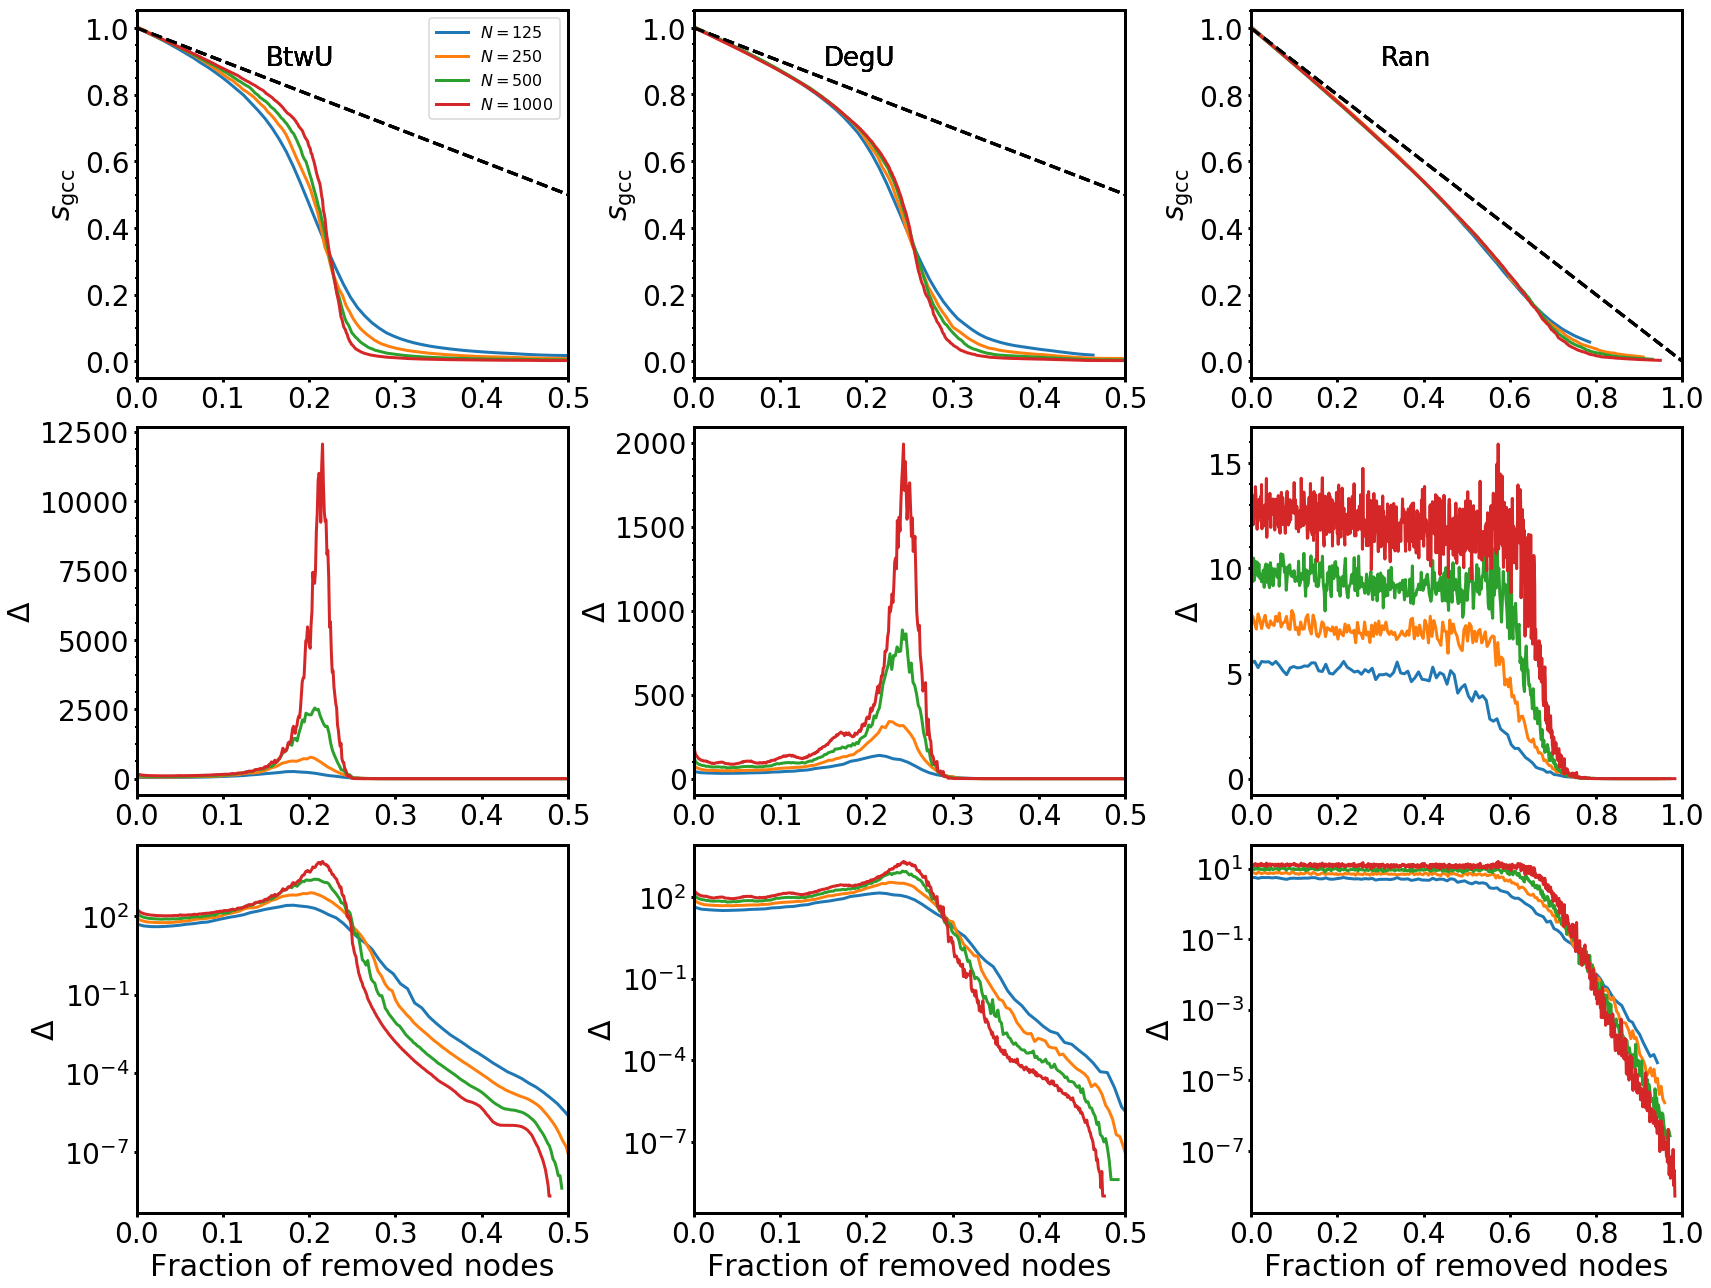

In [303]:
fig, axes = plt.subplots(figsize=(24, 18), ncols=3, nrows=3)

x_lims = [(0, 0.5), (0, 0.5), (0, 1)]

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(x_lims[i])
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        
        ax.text(0.3, 0.85, attack, transform=ax.transAxes, fontsize=26)
        #ax.set_xlim(0.20, 0.25)
        

        #ax.set_xlim(0.1, 0.3)
                      
        ax = axes[1][i]
        if N > 2000:
            continue
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        scaled = False
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)

        ax.plot(X2, Y2)
        
        ax = axes[2][i]
        if N > 2000:
            continue
        ax.set_xlabel('Fraction of removed nodes')
        
        ax.set_xlim(x_lims[i])
        X2 = np.arange(len(mean_delta2_btw_sum[N][attack])) / Ngcc0
        if scaled:
            if attack == 'BtwU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.666))
                ax.set_ylabel(r'$\Delta/N^{5/3}$')
            elif attack == 'DegU':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(1.333))
                ax.set_ylabel(r'$\Delta/N^{4/3}$')
            elif attack == 'Ran':
                Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2*N**(0.5))
                ax.set_ylabel(r'$\Delta/N^{0.5}$')
        else:
            Y2 = mean_delta2_btw_sum[N][attack] / (Ngcc0**2)
            ax.set_ylabel(r'$\Delta$')
        #Y2 = mean_delta2_btw_sum[N][attack] / ((Ngcc0**2)*N**(0))
        #Y2 = mean_delta2_btw_sum[N][attack] / (mean_Ngcc_values[N][attack]**2)
        
        ax.set_yscale('log')
        Y2[Y2==0] = np.NaN
        ax.plot(X2, Y2)
        #ax2.set_ylim(10E-8, 1)

plt.tight_layout()
if scaled:
    fig_base_name = 'Btw_change_ER_scaled'
else:
    fig_base_name = 'Btw_change_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Percolation analysis

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


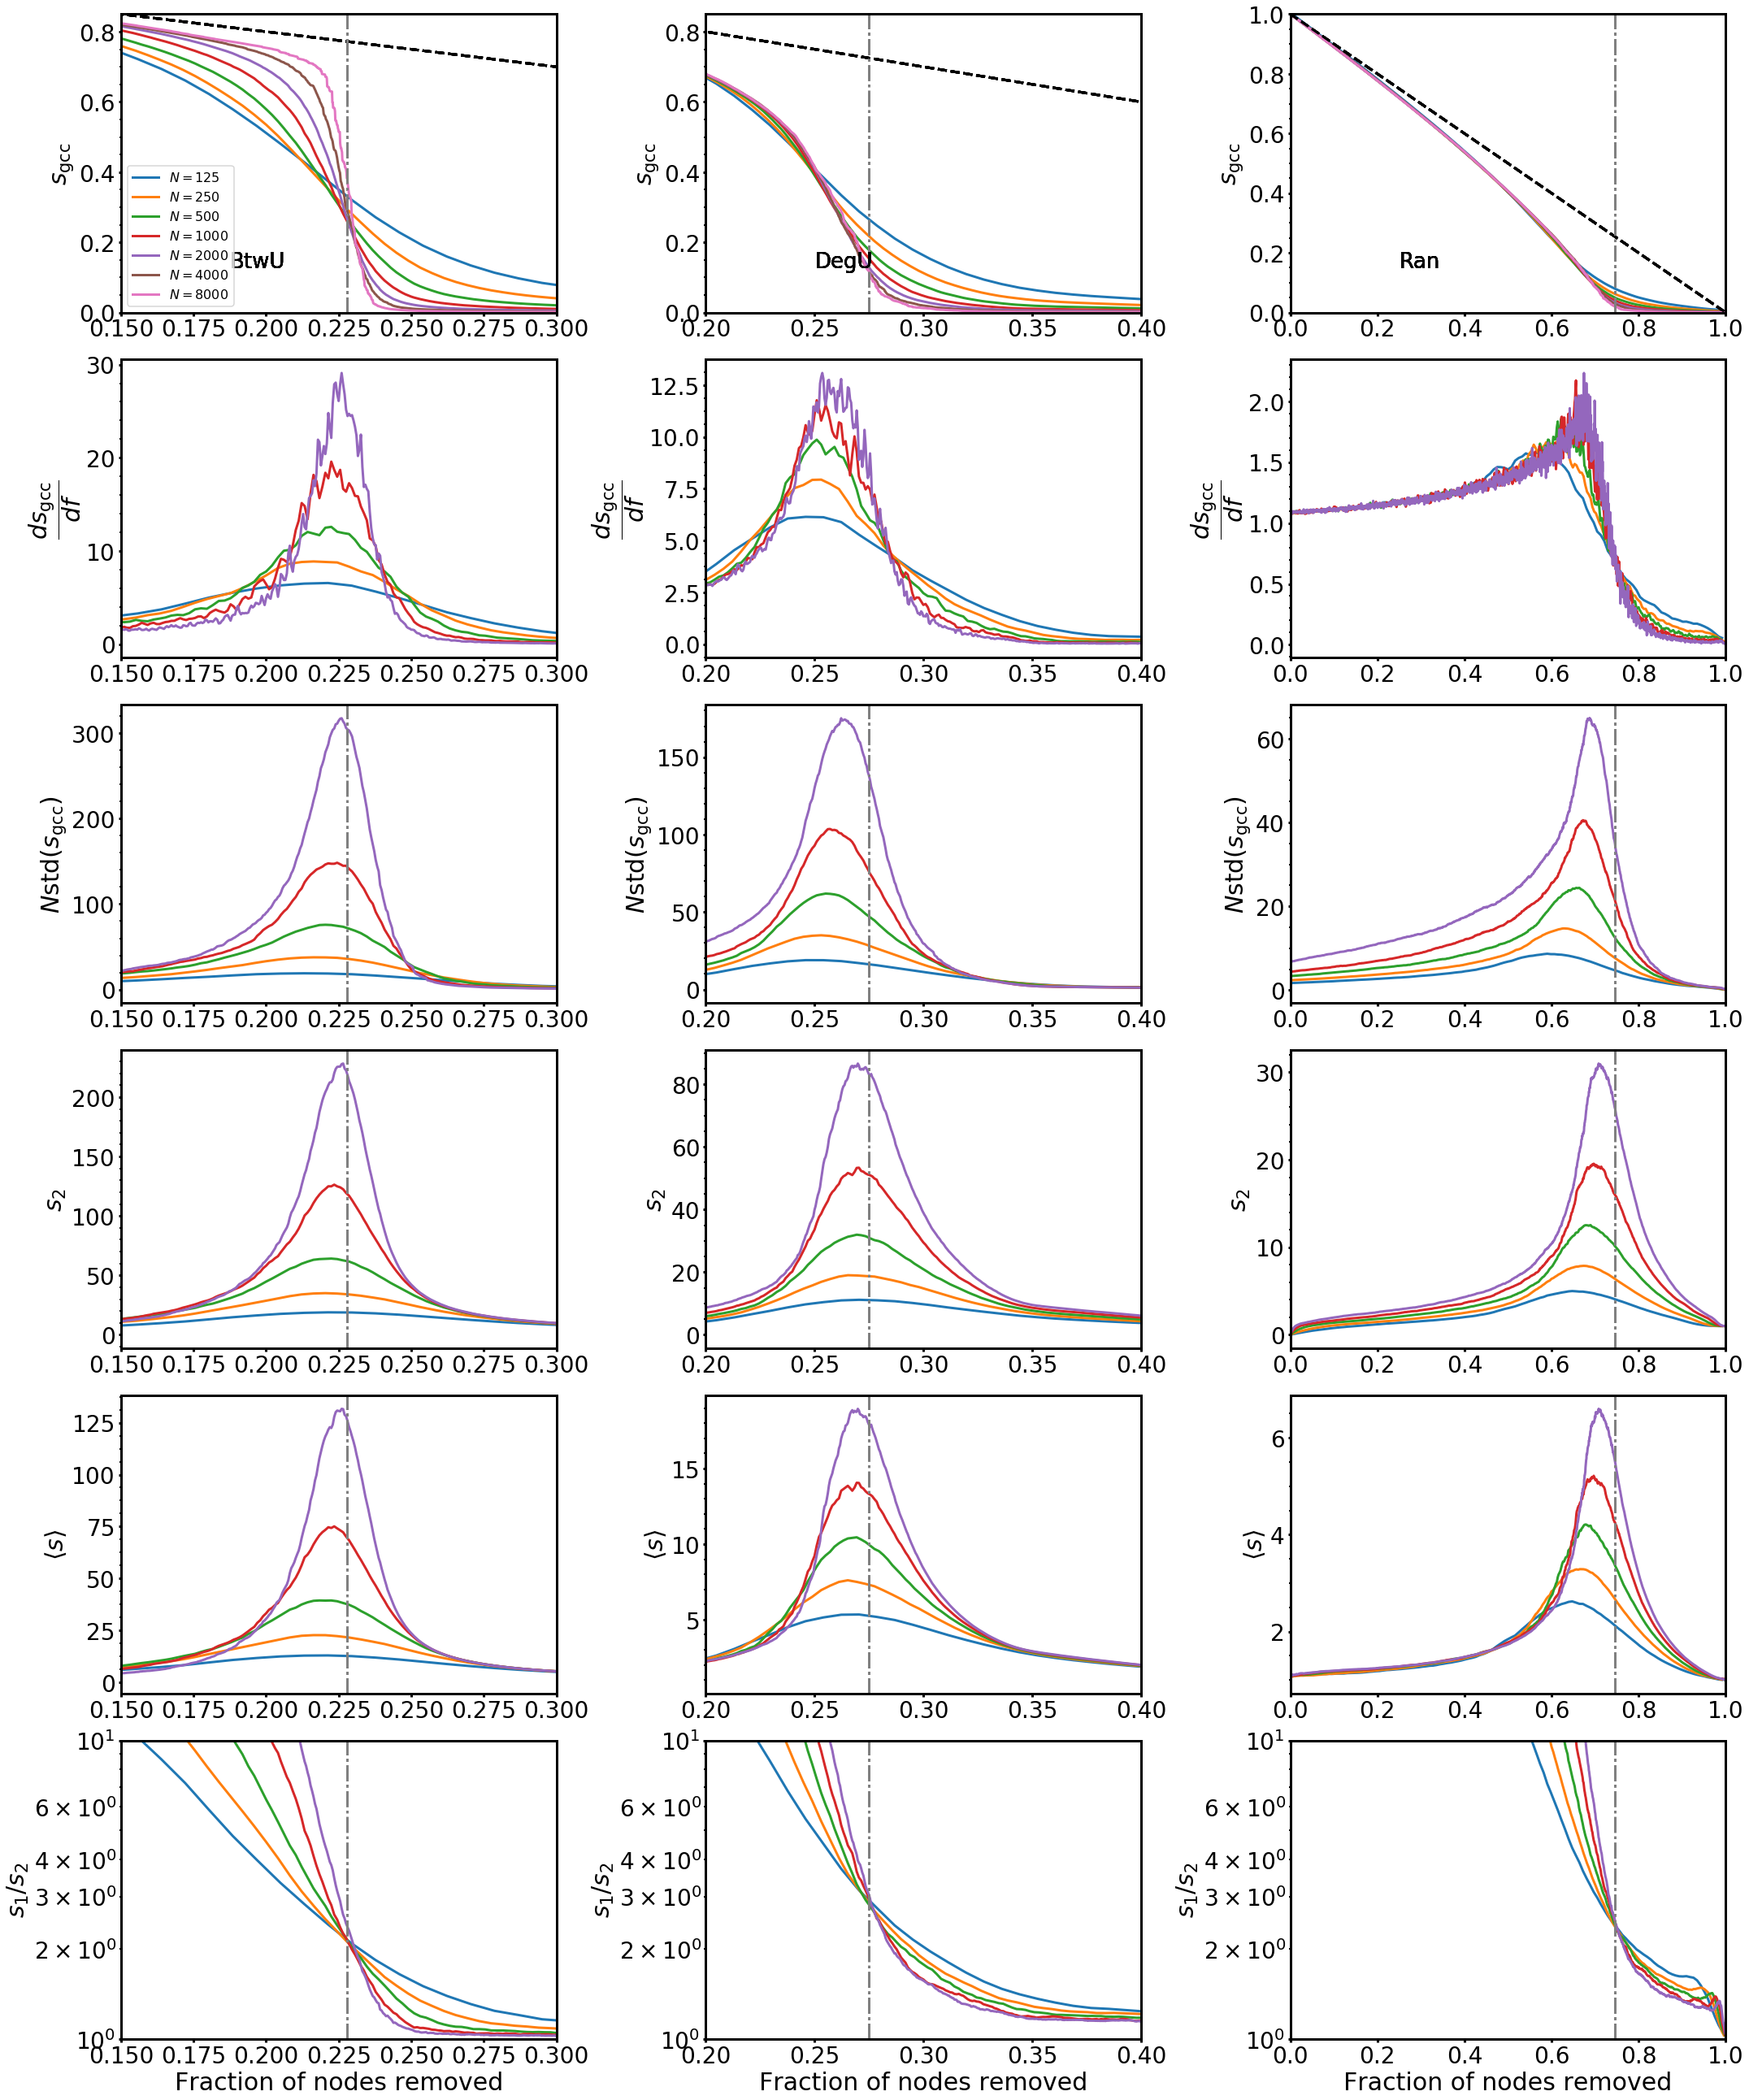

In [751]:
xlims = [(0.15, 0.3), (0.2, 0.4), (0., 1)]
#xlims = [(0.2, 0.25), (0.20, 0.35), (0.8, 0.95)]
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r'$s_{\mathrm{gcc}}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        if attack == 'BtwU':
            ax.set_ylim(0, 0.85)
        if attack == 'DegU':
            ax.set_ylim(0, 0.85)
        if attack == 'Ran':
            ax.set_ylim(0, 1)
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)
        
        line_x = np.arange(0, 1.01, 0.01)
        line_y = 1 - line_x
        ax.plot(line_x, line_y, '--', color='k')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.text(0.25, 0.15, attack, transform=ax.transAxes, fontsize=26)
        
        if N > 2000:
            continue
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\dfrac{ds_{\mathrm{gcc}}}{df}$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        dX = X[1] - X[0]
        dYdX = np.gradient(Y, dX)
        ax.plot(X, -dYdX)
              
        
        ax = axes[2][i]
        ax.set_ylabel(r'$N \mathrm{std}(s_{\mathrm{gcc}})$')
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        if False:
            if attack == 'BtwU':
                ax.set_ylim(0, 0.85)
            if attack == 'DegU':
                ax.set_ylim(0, 0.85)
            if attack == 'Ran':
                ax.set_ylim(0, 1)
            
        X = np.arange(Ngcc0) / Ngcc0
        Y = np.sqrt(var_Ngcc_values[N][attack][:Ngcc0])
        ax.plot(X, Y)
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        #ax.set_yscale('log')
        
        ax = axes[3][i]

        
        ax.set_xlabel('')
        ax.set_xlim(xlims[i])

        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Nsec_values[N][attack][:Ngcc0]

        ax.plot(X, Y)
        ax.set_ylabel(r'$s_2$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[4][i]
        #if N > 2000:
        #    continue
        ax.set_xlabel('')
        ax.set_xlim(xlims[i]) 
        
        X = np.arange(Ngcc0) / Ngcc0
        Y1 = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
        Y2 = mean_finiteSizeMeassures['meanS2'][N][attack][:Ngcc0]
        Y3 = mean_finiteSizeMeassures['binder'][N][attack][:Ngcc0]
        Y4 = mean_finiteSizeMeassures['binder2'][N][attack][:Ngcc0]

        if i == 0:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 1:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        elif i == 2:
            ax.plot(X, Y1)
            #ax.plot(X, Y2)
            #ax.plot(X, Y3)
            #ax.plot(X, Y4)
        ax.set_ylabel(r'$\langle s \rangle$')
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        
        
        ax = axes[5][i]
        #if N > 2000:
        #    continue
        ax.set_ylabel(r'$s_1 / s_2$')
        ax.set_xlabel('Fraction of nodes removed')
        #ax.set_xscale('log')
        ax.set_yscale('log')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_xlim(xlims[i])  
        if i == 0:
            ax.set_ylim(1, 10)
        else:
            ax.set_ylim(1, 10)

plt.tight_layout()

fig_base_name = 'Percolation_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

In [743]:
np.sqrt(var_Ngcc_values[N][attack][:Ngcc0]) * Ngcc0

array([55336.28498882, 55336.28498882, 55336.28498882, ...,
           0.        ,     0.        ,     0.        ])

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in true_divide


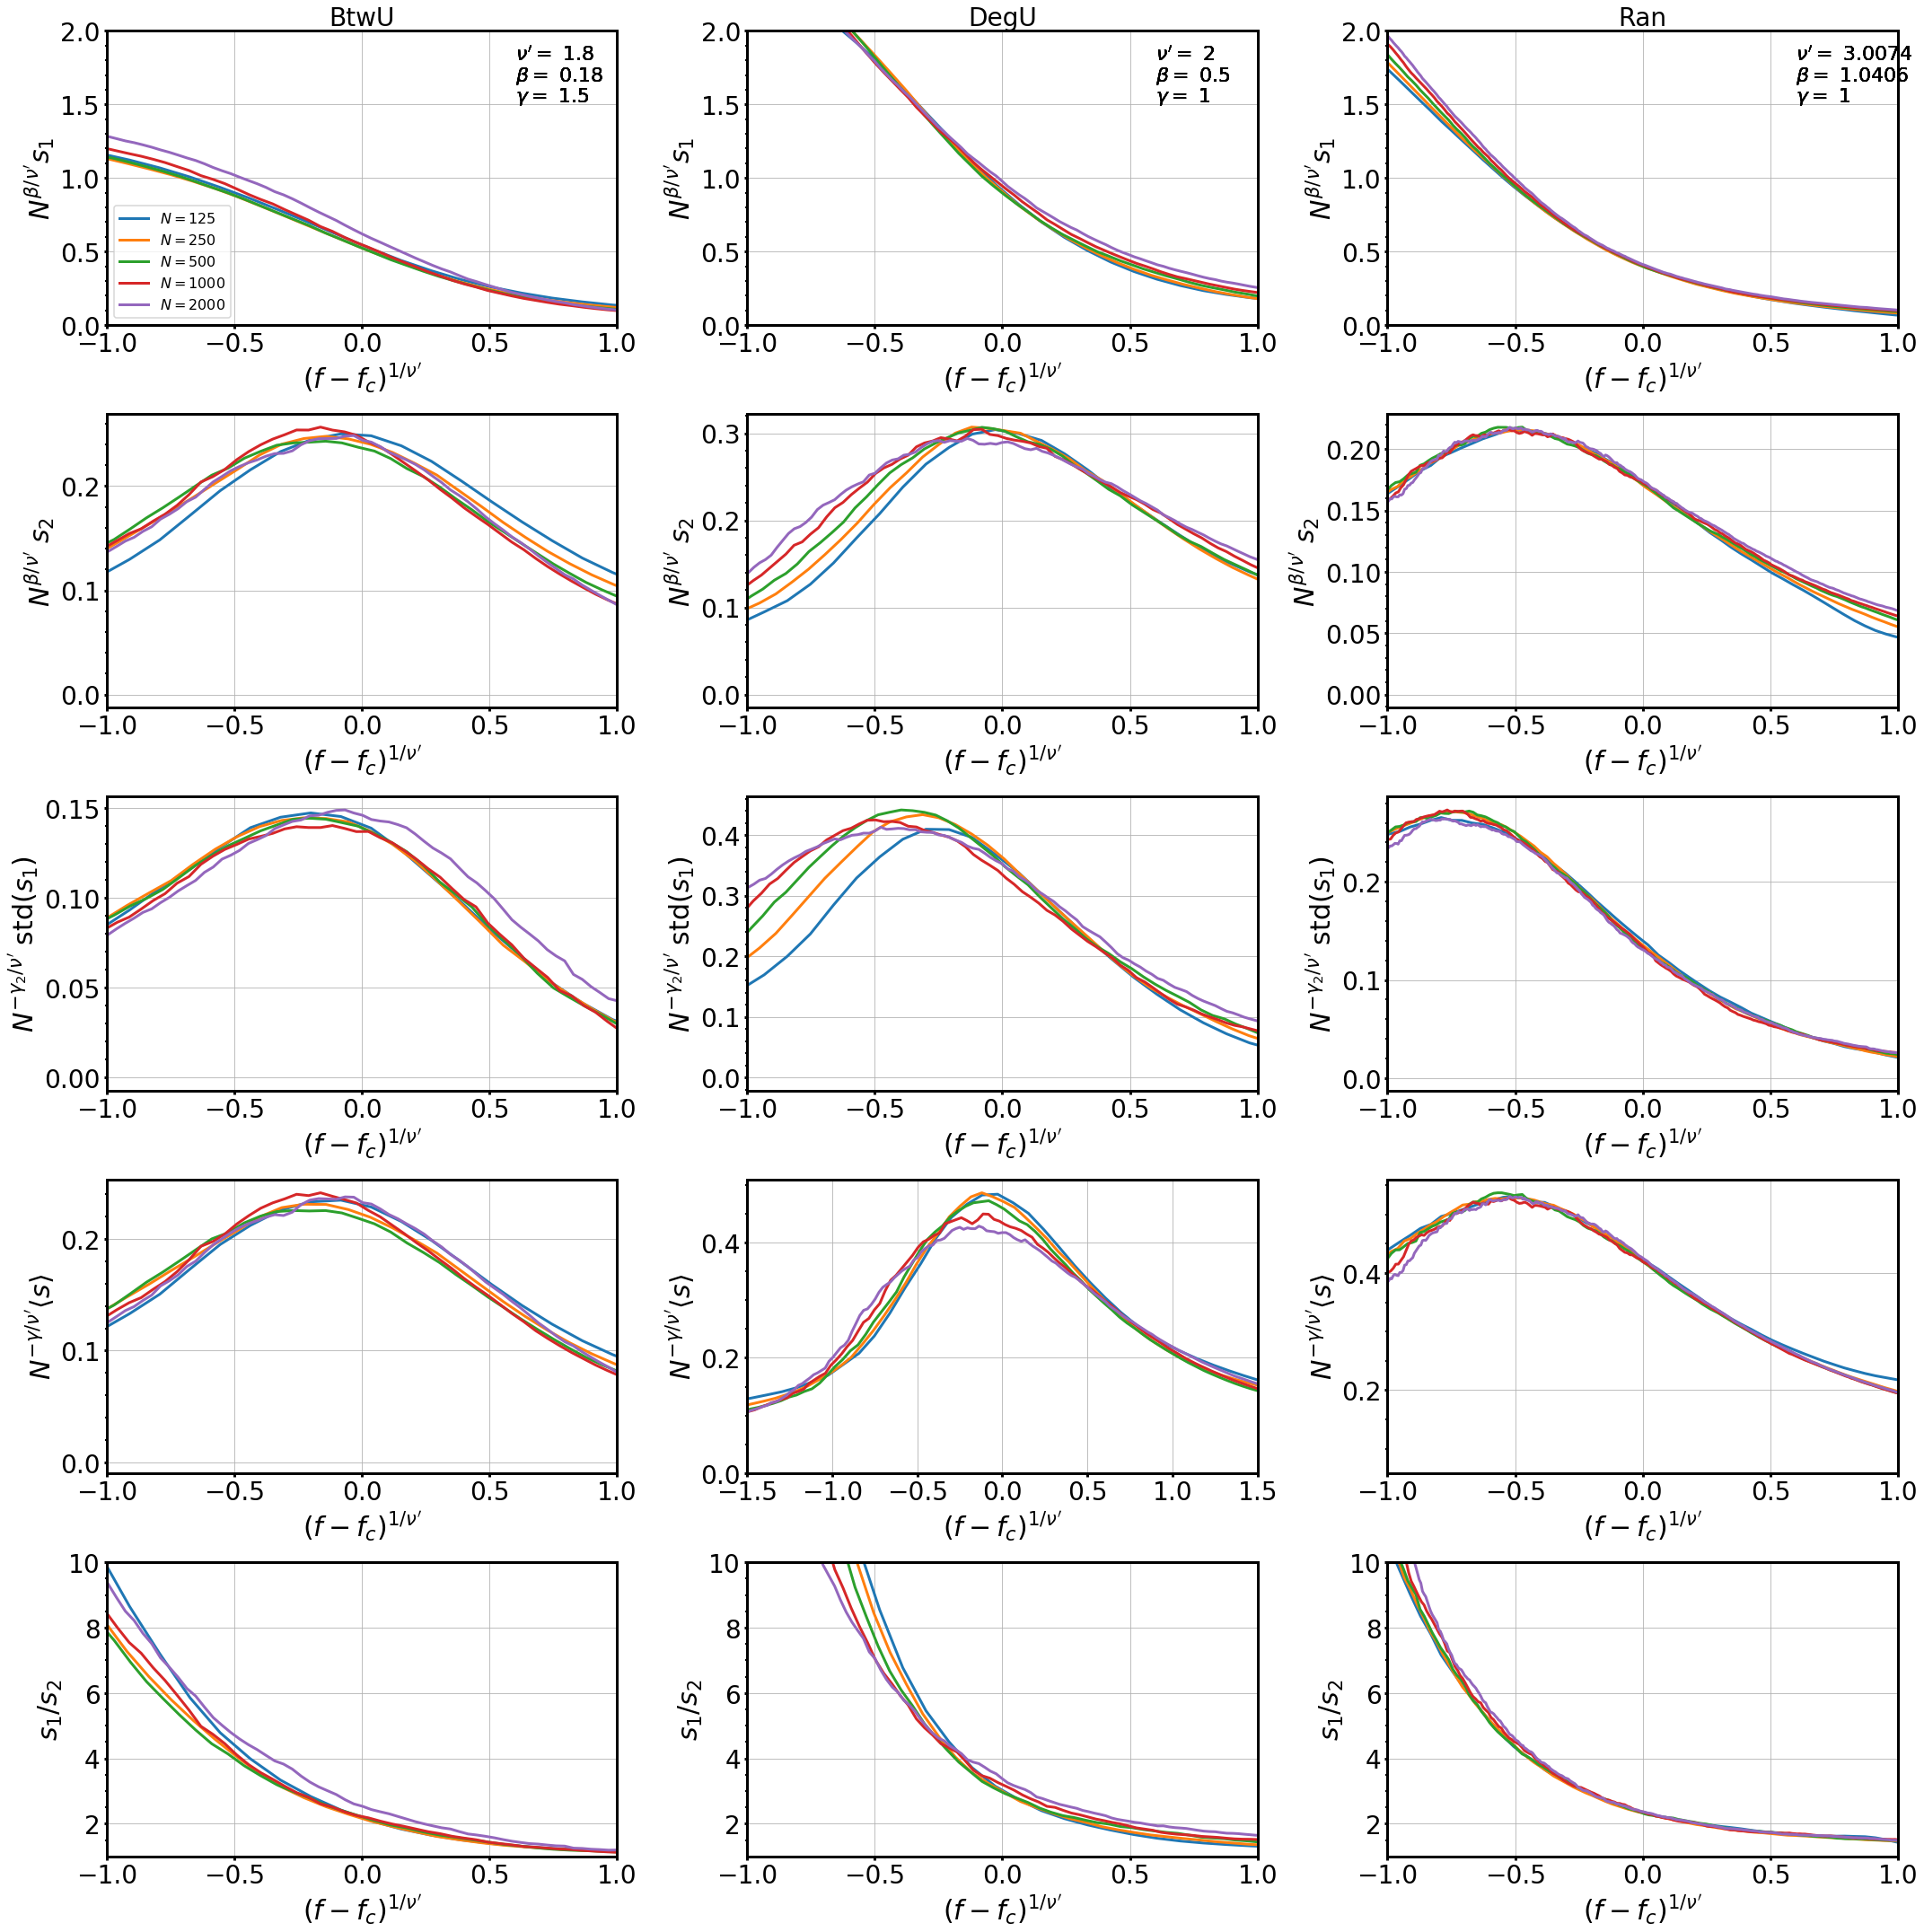

In [766]:
xlims = [(0., 0.45), (0., 0.45), (0., 0.95)]

f_crit_values = {'BtwU': 0.227,
                 'DegU': 0.273,
                 #'Ran' : 0.75
                 #'BtwU': 0.225,
                 #'DegU': 0.27,
                 'Ran' : 0.75
                }

dnu_values = {'BtwU': 1.8,
              #'DegU': 5/2,
              'DegU': 2,
              #'Ran' : 3
              'Ran' : 3.0074}

beta_values = {'BtwU': 0.18,
               #'DegU': 5/8,
               'DegU': 1/2,
               #'Ran' : 1
               'Ran' : 1.0406}

gamma_values = {'BtwU': 1.5,
                'DegU': 1,
                'Ran' : 1}

gamma2_values = {'BtwU': 1.011*dnu_values['BtwU'],
                'DegU': 0.798*dnu_values['DegU'],
                'Ran' : 0.726*dnu_values['Ran']}

ncols = 3
nrows = 5
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        
        if N > 2000:
            continue
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[0][i]
        ax.set_ylabel(r"$N^{\beta/\nu'}s_1$")
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_title(attack, fontsize=28)

        x_exponent = 1 / dnu_values[attack]
        y_exponent =  beta_values[attack] / dnu_values[attack]
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = (mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0) * Ngcc0**y_exponent        
        ax.text(0.8, 0.9, r"$\nu' =$" + r' {}'.format(dnu_values[attack]), 
                transform=ax.transAxes, fontsize=22)   
        ax.text(0.8, 0.83, r'$\beta =$' + r' {}'.format(beta_values[attack]), 
                transform=ax.transAxes, fontsize=22)
        ax.text(0.8, 0.76, r'$\gamma =$' + r' {}'.format(gamma_values[attack]), 
                transform=ax.transAxes, fontsize=22) 
        
        if attack == 'BtwU':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)
        if attack == 'DegU':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)
        if attack == 'Ran':
            ax.set_ylim(0, 2)
            ax.set_xlim(-1, 1)

        if i == 0:
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc=3, fontsize=16)
        else:
            ax.plot(X, Y)
        
        #ax.text(0.25, 0.15, attack, transform=ax.transAxes, fontsize=26)
        ax.grid(True)
        
        ax = axes[1][i]
        ax.grid(True)
        
        if N > 2000:
            continue
        
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{\beta/\nu'}\;s_2$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent =  beta_values[attack] / dnu_values[attack]
        
        #if attack == 'BtwU':
        #    x_exponent = 0.55
        #    y_exponent = 0.1
        
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = (mean_Nsec_values[N][attack][:Ngcc0] / Ngcc0) * Ngcc0**y_exponent
        ax.plot(X, Y)

        if i == 0:           
            ax.set_xlim(-1, 1)
        elif i == 1:
            ax.set_xlim(-1, 1)
        elif i == 2:
            ax.set_xlim(-1, 1)
            

        ax = axes[2][i]
        ax.grid(True)
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{-\gamma_2/\nu'}\;\mathrm{std}(s_1)$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent =  -gamma2_values[attack] / dnu_values[attack]
                
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = np.sqrt(var_Ngcc_values[N][attack][:Ngcc0]) * Ngcc0**y_exponent
        ax.plot(X, Y)

        if i == 0:           
            ax.set_xlim(-1, 1)
        elif i == 1:
            ax.set_xlim(-1, 1)
        elif i == 2:
            ax.set_xlim(-1, 1)
        
        
        ax = axes[3][i]
        ax.grid(True)            
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        ax.set_ylabel(r"$N^{-\gamma/\nu'} \langle s \rangle$")
        
        x_exponent = 1 / dnu_values[attack]
        y_exponent = - gamma_values[attack] / dnu_values[attack]
        
        #if attack == 'BtwU':
        #    x_exponent = 0.55
        #    y_exponent = -0.82
        
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]* Ngcc0**y_exponent
        ax.plot(X, Y)
        
        if i == 0:       
            ax.set_xlim(-1, 1)

        elif i == 1:
            ax.set_xlim(-1.5, 1.5)
        elif i == 2:
            ax.set_xlim(-1, 1)


        ax = axes[4][i]
        ax.grid(True)
        

        ax.set_ylabel(r'$s_1 / s_2$')
        ax.set_xlabel(r"$(f-f_c)^{1/\nu'}$")
        #ax.set_xscale('log')
        #ax.set_yscale('log')
        
        x_exponent = 1 / dnu_values[attack]  
        X = (np.arange(Ngcc0) / Ngcc0 - f_crit_values[attack]) * Ngcc0**x_exponent
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / mean_Nsec_values[N][attack][:Ngcc0]
        ax.plot(X, Y)
        if i == 0:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        elif i == 1:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        elif i == 2:
            ax.set_xlim(-1, 1)  
            ax.set_ylim(1, 10)
        
        

plt.tight_layout()

fig_base_name = 'Percolation_ER_scaled'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


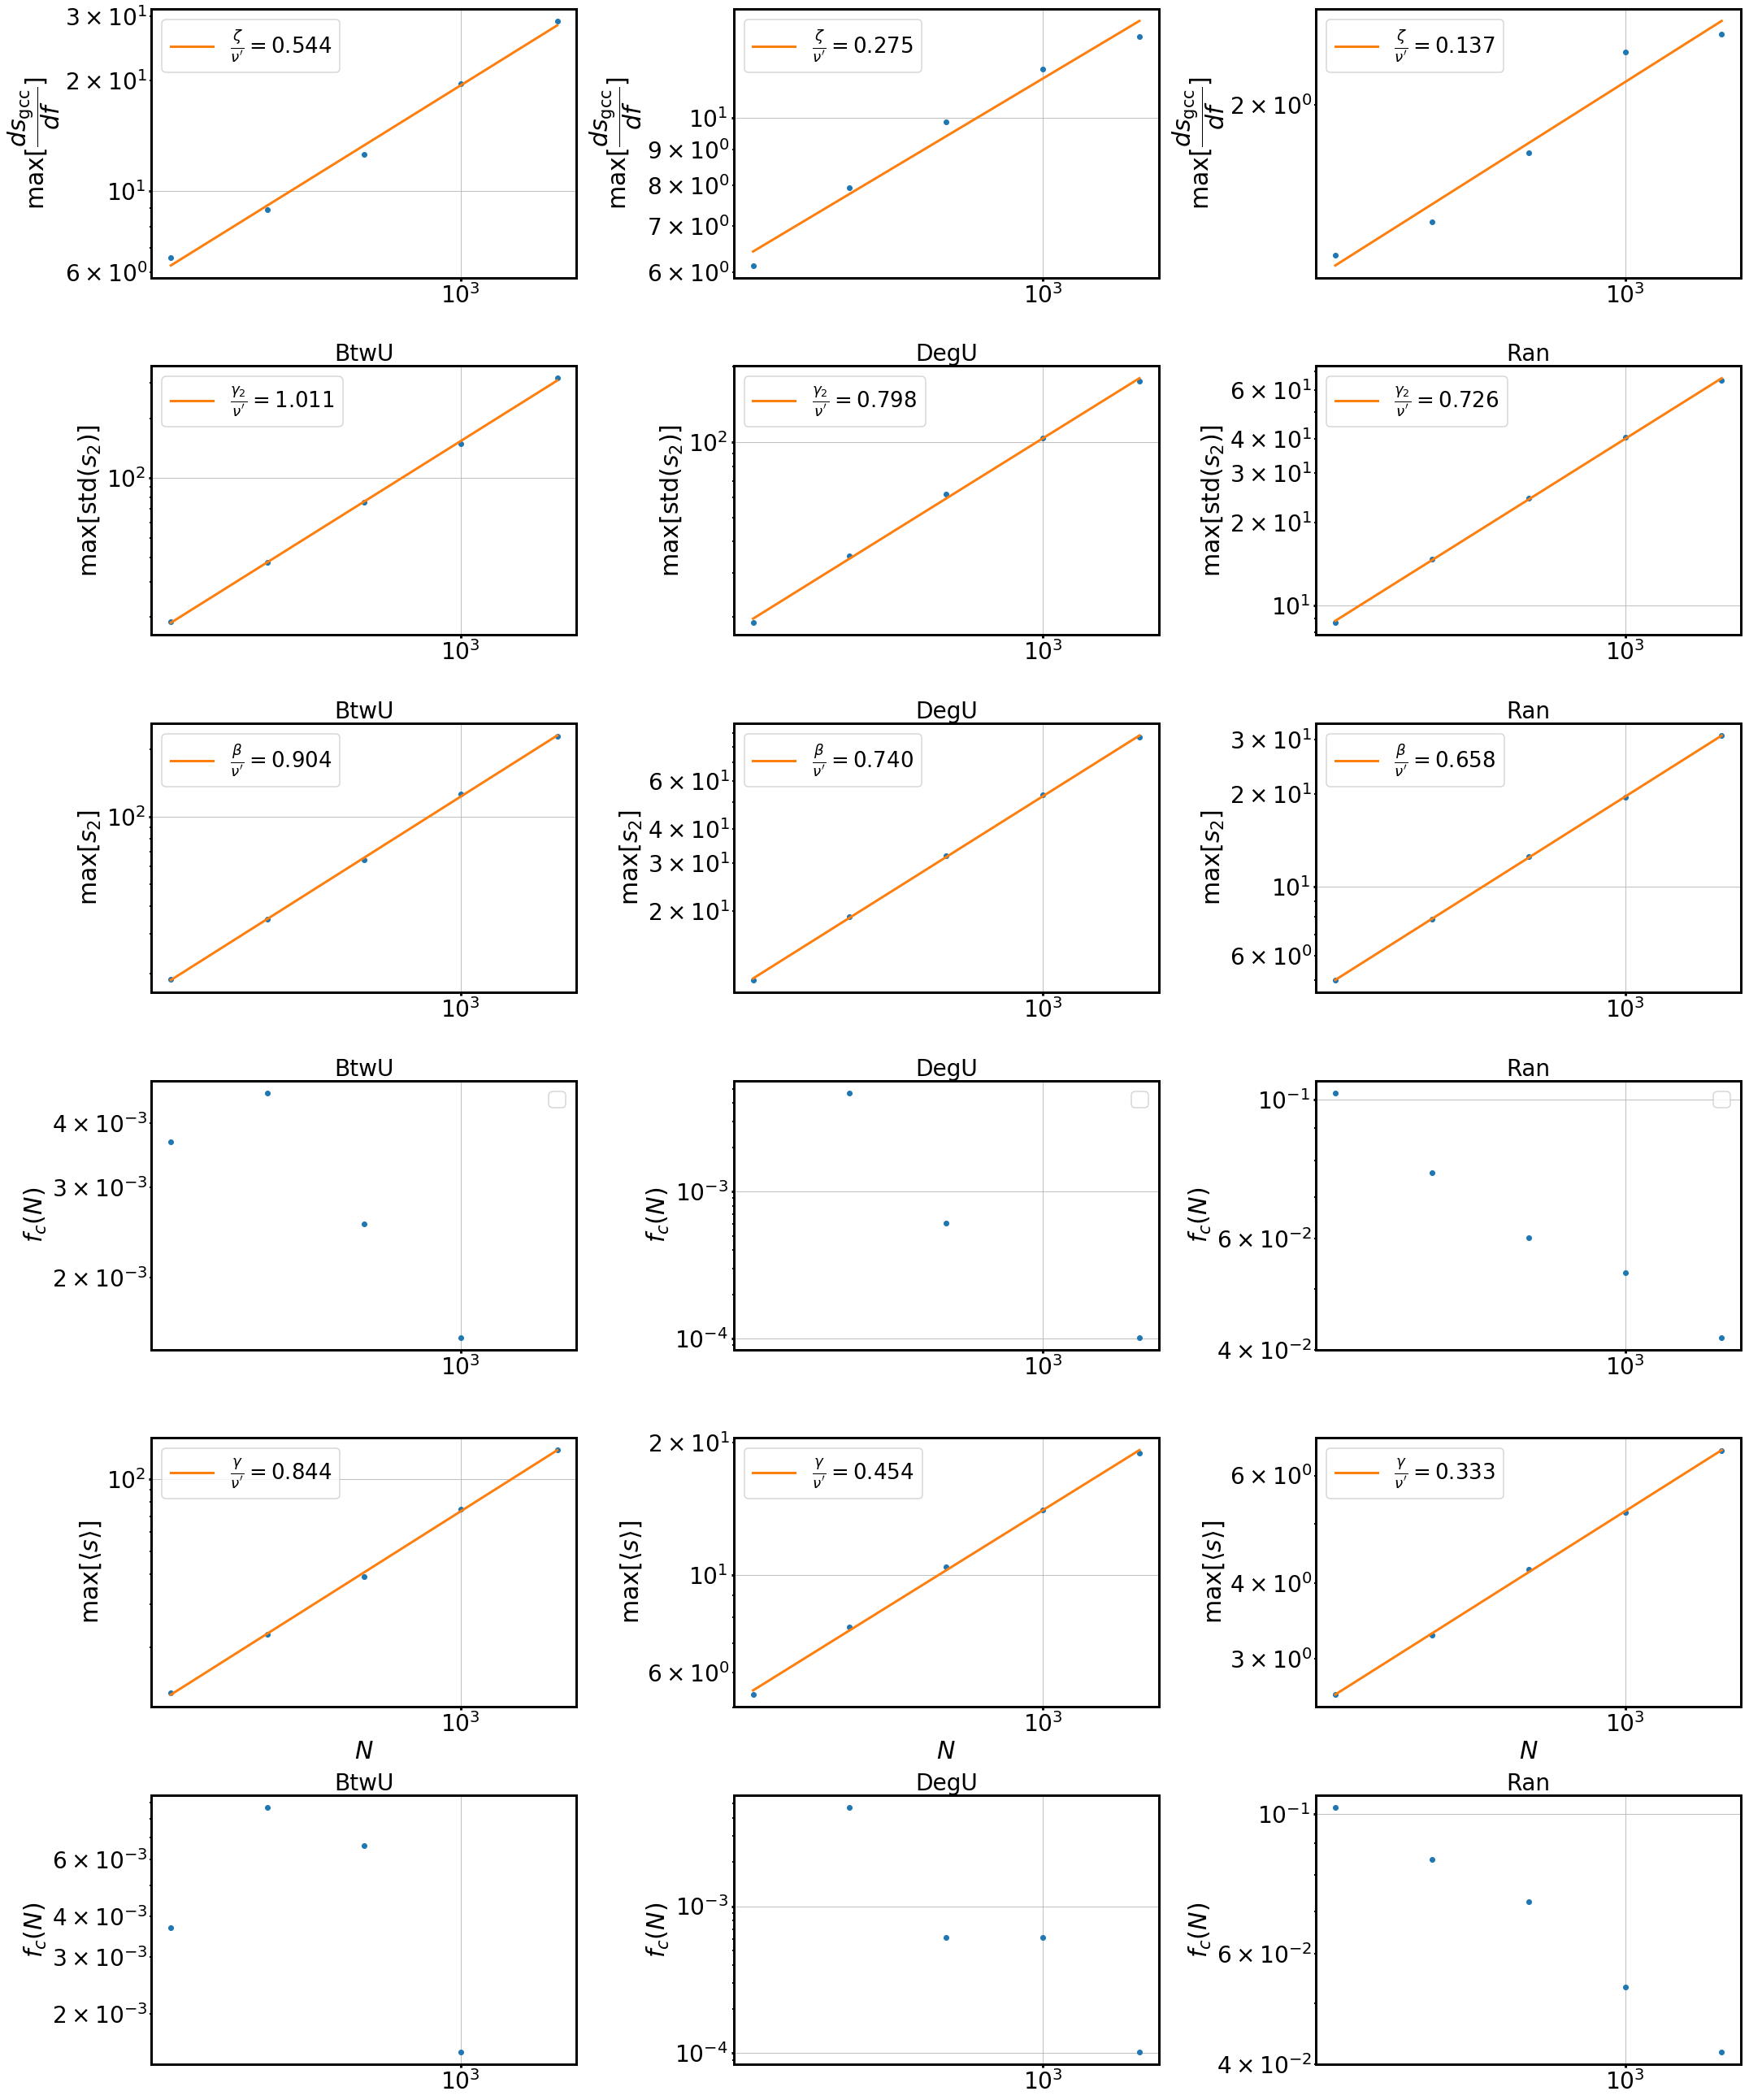

In [762]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

from scipy.optimize import curve_fit

def fc_by_N(N, pc, b, nu):
    return pc - b*N**(-1/nu)

_N_values = N_values[:-2]

pguess = {}
for attack in attacks:
    pguess[attack] = [f_crit_values[attack], 1, dnu_values[attack]]

Ngcc_crit = {}
max_dNgcc = {}
max_stdNgcc = {}
max_stdNgcc_loc = {}
max_Nsec = {}
max_Nsec_loc = {}
max_meanSizes = {}
max_meanSizes_loc = {}
for i, attack in enumerate(attacks):
    Ngcc_crit[attack] = []
    max_dNgcc[attack] = []
    max_stdNgcc[attack] = []
    max_stdNgcc_loc[attack] = []
    max_Nsec[attack] = []
    max_Nsec_loc[attack] = []
    max_meanSizes[attack] = []
    max_meanSizes_loc[attack] = []
    for N in _N_values:
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        dX = X[1] - X[0]
        dYdX = -np.gradient(Y, dX)
        
        idx = np.argmax(dYdX)
        Y_max = dYdX[idx]     
        max_dNgcc[attack].append(Y_max)
        
        
        idx = np.argmax(var_Ngcc_values[N][attack])
        Y = np.sqrt(var_Ngcc_values[N][attack][idx])
        max_stdNgcc[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_stdNgcc_loc[attack].append(Y_loc)
        
        
        idx = np.argmax(mean_Nsec_values[N][attack])
        Y = mean_Nsec_values[N][attack][idx]
        max_Nsec[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_Nsec_loc[attack].append(Y_loc)
        
        
        idx = np.nanargmax(mean_finiteSizeMeassures['meanS'][N][attack])
        Y = mean_finiteSizeMeassures['meanS'][N][attack][idx]
        max_meanSizes[attack].append(Y)
        Y_loc = (np.arange(Ngcc0) / Ngcc0)[idx]
        max_meanSizes_loc[attack].append(Y_loc)     
        
        #int(N*f_value)
        
    max_dNgcc[attack] = np.array(max_dNgcc[attack])
    max_stdNgcc[attack] = np.array(max_stdNgcc[attack])
    max_Nsec[attack] = np.array(max_Nsec[attack])
    max_meanSizes[attack] = np.array(max_meanSizes[attack])
    
    max_stdNgcc_loc[attack] = np.array(max_stdNgcc_loc[attack])
    max_Nsec_loc[attack] = np.array(max_Nsec_loc[attack])
    max_meanSizes_loc[attack] = np.array(max_meanSizes_loc[attack])
    

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
                 
    ax = axes[0][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ \dfrac{ds_{\mathrm{gcc}}}{df} ]$")

    ax.plot(_N_values, max_dNgcc[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_dNgcc[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\zeta}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    ax = axes[1][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ \mathrm{std}(s_2) ]$")
    ax.set_title(attack, fontsize=28)

    ax.plot(_N_values, max_stdNgcc[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_stdNgcc[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\gamma_2}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    
    ax = axes[2][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$\mathrm{max}[ s_2 ]$")
    ax.set_title(attack, fontsize=28)

    ax.plot(_N_values, max_Nsec[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_Nsec[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\beta}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    
    ax = axes[3][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$f_c(N)$")
    ax.set_title(attack, fontsize=28)
   
    X = _N_values
    Y = max_Nsec_loc[attack]
    #popt, pcov = curve_fit(fc_by_N, X, Y, pguess[attack])
    #pc, b, nu = popt
    #print(popt)
    #Y_pred = fc_by_N(X, *popt)
    ax.plot(_N_values, f_crit_values[attack] - max_Nsec_loc[attack], 'o')
    #ax.plot(N_values[:-1], (pc - Y_pred))
    
    ax.legend(loc='best')
    
    ax = axes[4][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$N$")
    ax.set_ylabel(r"$\mathrm{max}[ \langle s \rangle ]$")

    ax.plot(_N_values, max_meanSizes[attack], 'o')
    
    X = np.log(_N_values).reshape(-1, 1)
    Y = np.log(max_meanSizes[attack]).reshape(-1, 1)
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    slope = linear_regressor.coef_[0][0]
    ax.plot(_N_values, np.exp(Y_pred), label=r"$\frac{\gamma}{\nu'} =$" + '{:.3f}'.format(slope))
    ax.legend(loc='best')
    
    ax = axes[5][i]
    ax.grid(True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$f_c(N)$")
    ax.set_title(attack, fontsize=28)
   
    X = _N_values
    Y = max_meanSizes_loc[attack]
    #popt, pcov = curve_fit(fc_by_N, X, Y, pguess[attack])
    #pc, b, nu = popt
    #print(popt)
    #Y_pred = fc_by_N(X, *popt)
    ax.plot(_N_values, f_crit_values[attack] - max_meanSizes_loc[attack], 'o')
    #ax.plot(N_values[:-1], (pc - Y_pred))

plt.tight_layout()

fig_base_name = 'Peaks_scaling'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw order parameters

In [287]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002]
seeds_by_N = [range(2000), range(2000), range(1000), range(1000), range(1000)]

attacks = ['BtwU', 'DegU', 'Ran']

spin_types = [0, 1, 2, 3, 4]

spin_sums = {}
for spin_type in spin_types:
    spin_sums[spin_type] = {}

mean_spin_sums = {}
var_spin_sums  = {}    
for spin_type in spin_types:
    mean_spin_sums[spin_type] = {}
    var_spin_sums[spin_type]  = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):
    print(N)
    for spin_type in spin_types:
        spin_sums[spin_type][N] = {}


    for spin_type in spin_types:
        mean_spin_sums[spin_type][N] = {}
        var_spin_sums[spin_type][N]  = {}

    for attack in attacks:
        
        for spin_type in spin_types:
            spin_sums[spin_type][N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_btw_file_name  = os.path.join(attack_dir_name, 'orderParams.txt')
            _spin_meassures = np.loadtxt(full_btw_file_name)
                       
            spin_sums[0][N][attack].append(_spin_meassures[:,0])
            spin_sums[1][N][attack].append(_spin_meassures[:,1])
            spin_sums[2][N][attack].append(_spin_meassures[:,2])
            spin_sums[3][N][attack].append(_spin_meassures[:,3])
            spin_sums[4][N][attack].append(_spin_meassures[:,4])

        for spin_type in spin_types:
            mean_spin_sums[spin_type][N][attack] = np.mean(spin_sums[spin_type][N][attack], axis=0)
            var_spin_sums[spin_type][N][attack] = np.var(spin_sums[spin_type][N][attack], axis=0)

125
250
500
1000


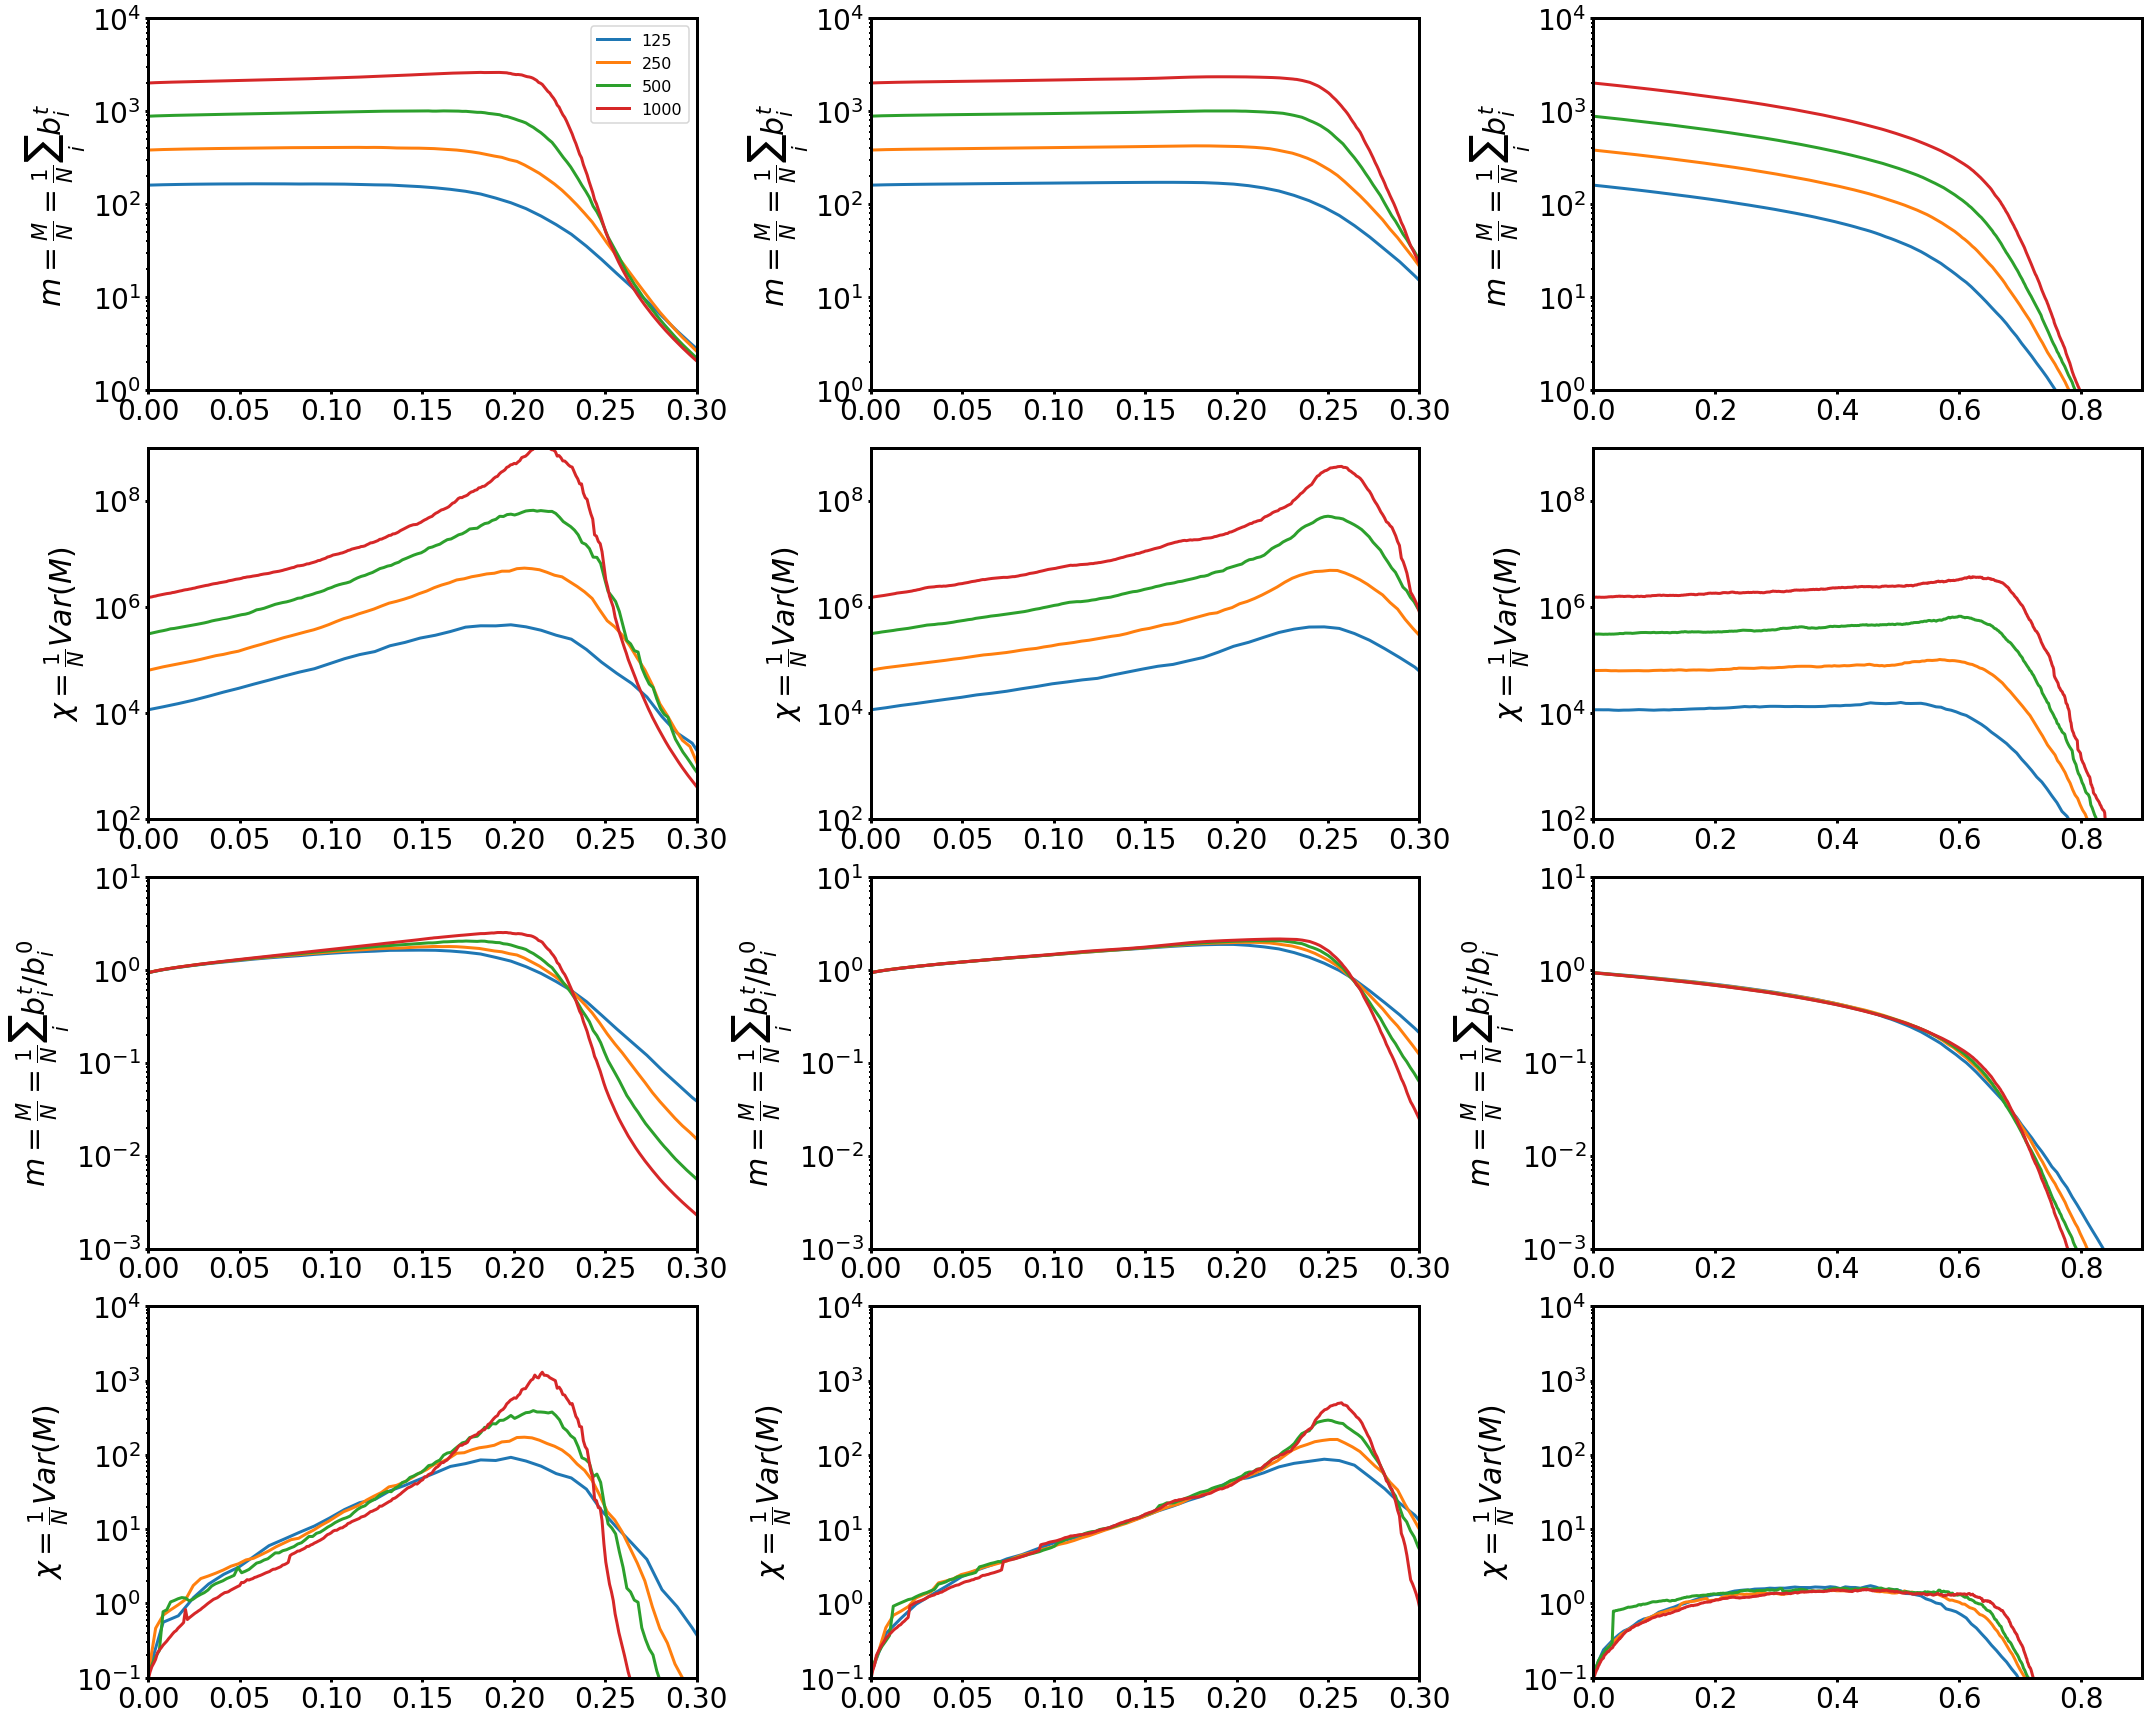

In [290]:
xlims = [(0, 0.3), (0, 0.3), (0, 0.9)]

ncols = 3
nrows = 4
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
           
        ax = axes[0][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[0][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(1, 10000)
        ax.set_yscale('log')
        if i == 0:
            ax.plot(X, Y, label=N)   
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y)   
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[0][N][attack][:Ngcc0]  / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(100, 10E8)
        ax.set_yscale('log')
        ax.plot(X, Y)  

        ax = axes[2][i]
        ax.set_ylabel(r'$M = \sum_i b_i^t / b_i^0$')
        ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^t / b_i^0$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_spin_sums[1][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(0.001, 10)
        ax.set_yscale('log')
        ax.plot(X, Y)   

        ax = axes[3][i]
        ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = var_spin_sums[1][N][attack][:Ngcc0] / Ngcc0
        ax.set_xlim(xlims[i])
        ax.set_ylim(0.1, 10000)
        ax.set_yscale('log')
        ax.plot(X, Y)  
        
        if False:
            ax = axes[4][i]
            ax.set_ylabel(r'$M = \sum_i b_i^{t+1} / b_i^{t}$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i b_i^{t+1} / b_i^{t}$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[2][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_ylim(0.1, 1000)
            ax.plot(X, Y)   

            ax = axes[5][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[2][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y)  

            ax = axes[6][i]
            ax.set_ylabel(r'$M = \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \log \left( \frac{b_i^t + 1}{\langle b^t \rangle + 1} \right)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[3][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.plot(X, Y)   

            ax = axes[7][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[3][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y)  


            ax = axes[8][i]
            ax.set_ylabel(r'$M = \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
            ax.set_ylabel(r'$m = \frac{M}{N} = \frac{1}{N} \sum_i \tanh \left( \frac{b_i^t}{\langle b^t \rangle} \right)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = mean_spin_sums[4][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.plot(X, Y)   

            ax = axes[9][i]
            ax.set_ylabel(r'$\chi = \frac{1}{N} Var(M)$')
            ax.set_xlabel('')
            X = np.arange(Ngcc0) / Ngcc0
            Y = var_spin_sums[4][N][attack][:Ngcc0] / Ngcc0
            ax.set_xlim(xlims[i])
            ax.set_yscale('log')
            ax.plot(X, Y) 


plt.tight_layout()
fig_base_name = 'ER_orderParams'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Btw distribution parameters

/media/nahuel-ofi/datos/d/anaconda3/envs/networks3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


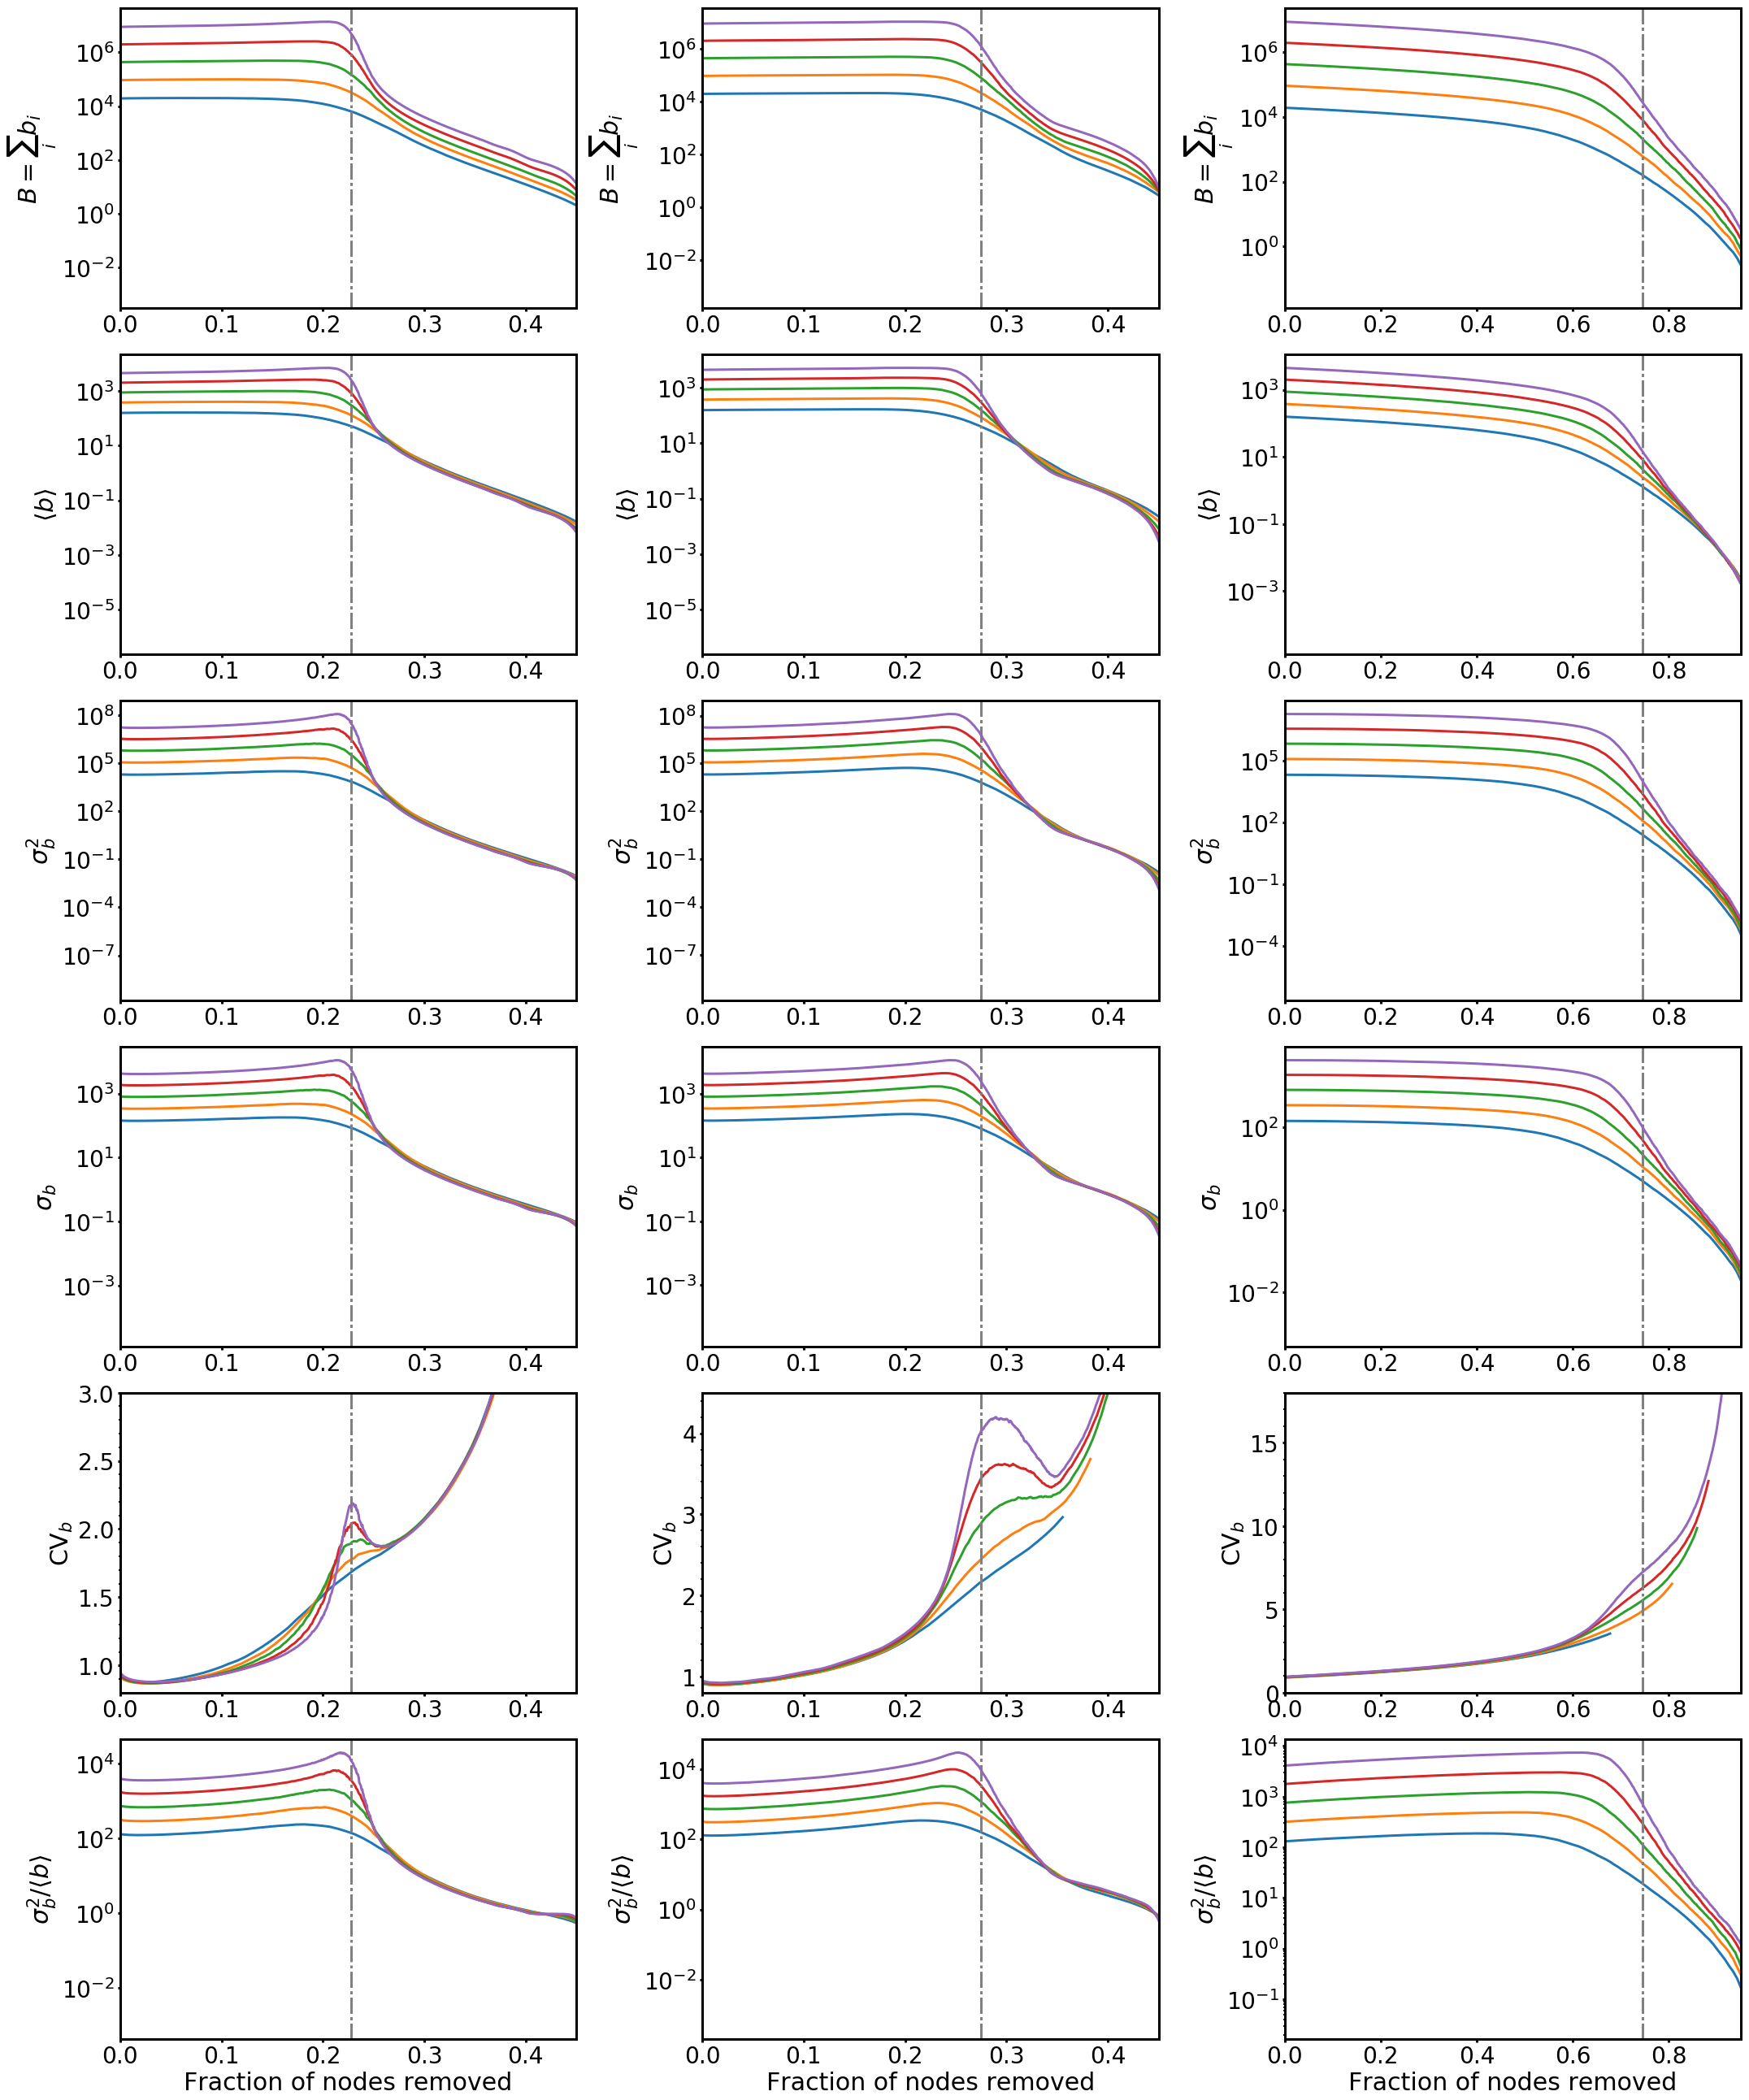

In [261]:
vlines = [0.228, 0.275, 0.745]

ylims = [(0.8, 3), (0.8, 4.5), (0, 18)]

ncols = 3
nrows = 6
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
                     
        ax = axes[0][i]
        ax.set_ylabel(r'$B = \sum_i b_i$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_sum[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)            
       
        
        ax = axes[1][i]
        ax.set_ylabel(r'$\langle b \rangle$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_mean[N][attack][:Ngcc0] 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

        ax = axes[2][i]
        ax.set_ylabel(r'$\sigma^2_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[3][i]
        ax.set_ylabel(r'$\sigma_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)
        
        ax = axes[4][i]
        ax.set_ylabel(r'$\mathrm{CV}_b$')
        ax.set_xlabel('')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_CV[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.set_ylim(ylims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.plot(X, Y)
        
        ax = axes[5][i]
        ax.set_ylabel(r'$\sigma^2_b/\langle b \rangle$')
        ax.set_xlabel('Fraction of nodes removed')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_btw_std[N][attack][:Ngcc0]**2 / mean_btw_mean[N][attack][:Ngcc0]
        ax.set_xlim(xlims[i])
        ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.set_yscale('log')
        ax.plot(X, Y)

plt.tight_layout()
fig_base_name = 'Btw_dist_params_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Difference between attacks

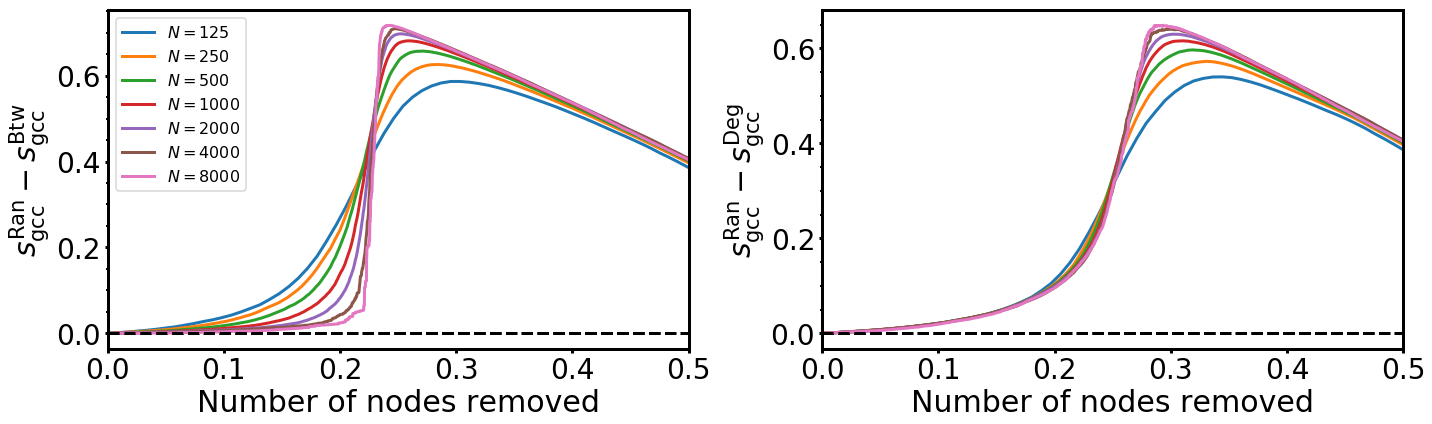

In [36]:
fig, axes = plt.subplots(figsize=(10*2, 6*1), ncols=2, nrows=1)

x_lims = [(0, 0.5), (0, 0.5), (0, 1)]

for i, attack in enumerate(attacks):
    if i > 1:
        continue
        
    for N in N_values:
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        ax = axes[i]
        #ax.set_xlabel('Fraction of removed nodes')
        ax.set_xlabel('Number of nodes removed')
        
        line_x = np.arange(0, 1.01, Ngcc0)
        line_y = 1 - line_x
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = (mean_Ngcc_values[N]['Ran'][:Ngcc0] / Ngcc0) - (mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0) 
        ax.set_xlim(x_lims[i])
        
        if i == 0:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Btw}}_{\mathrm{gcc}} $')
            ax.plot(X, Y, label=r'$N = $' + '{}'.format(N))
            ax.legend(loc='best', fontsize=16)
        elif i == 1:
            ax.set_ylabel(r'$s^{\mathrm{Ran}}_{\mathrm{gcc}} - s^{\mathrm{Deg}}_{\mathrm{gcc}} $')
            ax.plot(X, Y)
        ax.axhline(0, linestyle='--', color='k')
        #ax.set_xlim(0.20, 0.25)
        

        #ax.set_xlim(0.1, 0.3)

plt.tight_layout()

fig_base_name = 'Percolation2_ER'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

### Modularity analysis

In [125]:
net_dir_name = '../networks/ER'

N_values = [125, 250, 500, 1000, 2000, 4000, 8000]
p_values = [0.032, 0.016, 0.008, 0.004, 0.002, 0.001, 0.0005]
seeds_by_N = [range(1000), range(100), range(100), range(58), range(86), range(10), range(3)]

attacks = ['BtwU', 'DegU', 'Ran']


q_values = {}
mean_q_values = {}
std_q_values = {}

Ngcc_values = {}
mean_Ngcc_values = {}
    
for N, p, seeds in zip(N_values, p_values, seeds_by_N):

    q_values[N] = {}    
    mean_q_values[N] = {}
    std_q_values[N] = {}
    
    Ngcc_values[N] = {}
    mean_Ngcc_values[N] = {}

    for attack in attacks:
        
        q_values[N][attack] = []
        
        Ngcc_values[N][attack] = []
        
        for seed in seeds:
                       
            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)
            
            attack_dir_name = os.path.join(net_dir_name, network, attack)
            
            full_q_values_file_name  = os.path.join(attack_dir_name, 'q_values.txt')
            data = np.loadtxt(full_q_values_file_name)
            
            _q_values = data[:,0]
            _Ngcc_values = data[:,1]
            
            q_values[N][attack].append(_q_values)
            Ngcc_values[N][attack].append(_Ngcc_values)

        mean_q_values[N][attack] = np.mean(q_values[N][attack], axis=0)
        std_q_values[N][attack] = np.std(q_values[N][attack], axis=0)
        
        mean_Ngcc_values[N][attack] = np.mean(Ngcc_values[N][attack], axis=0)

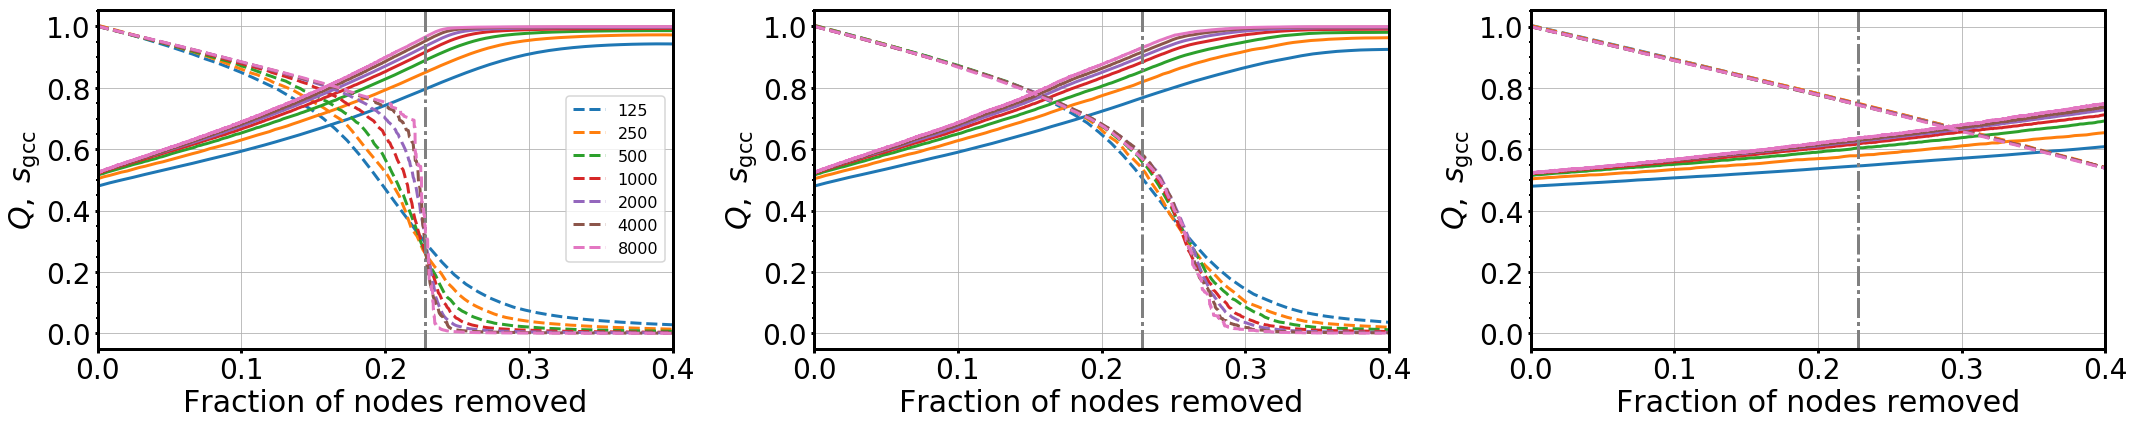

In [126]:
vlines = [0.228, 0.275, 0.745]

ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):
    ax = axes[i]
    for j, N in enumerate(N_values):
        
        Ngcc0 = int(mean_Ngcc_values[N][attack][0])
        
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_q_values[N][attack][:Ngcc0]
        Y_err = std_q_values[N][attack][:Ngcc0]
        ax.plot(X, Y, color=colors[j])
        #ax.fill_between(X, Y-Y_err, Y+Y_err, alpha=0.3)
        #ax.axvline(vlines[i], linestyle='-.', color='grey')
        ax.axvline(vlines[0], linestyle='-.', color='grey')
        X = np.arange(Ngcc0) / Ngcc0
        Y = mean_Ngcc_values[N][attack][:Ngcc0] / Ngcc0
        if i == 0:
            ax.plot(X, Y, linestyle='--', color=colors[j], label=N)
            ax.legend(loc='best', fontsize=16)
        else:
            ax.plot(X, Y, linestyle='--', color=colors[j])
        ax.set_xlim(0, 0.4)
        ax.grid(True)
        ax.set_ylabel(r'$Q,\; s_{\mathrm{gcc}}$')
        ax.set_xlabel('Fraction of nodes removed')
        
plt.tight_layout()
fig_base_name = 'ER_modularity'
plt.savefig(fig_dir + '/png/' + fig_base_name + '.png')
plt.savefig(fig_dir + '/pdf/' + fig_base_name + '.pdf')
plt.show()

In [380]:
import pickle
import bz2

def counterToList(counter):

    try:
        counter[0][0]
    except:
        return [counter[0]]

    lst = []
    for s, ns in counter:
        lst += [s]*ns
    return sorted(lst, reverse=True)[1:]

def get_ccdf(data):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    return sorted_vals, ccdf

N = 2000
p = 0.002
seeds = range(1000)

f_values_by_attack = {'BtwU': [0.15, 0.2, 0.22, 0.228, 0.25, 0.30],
                      'DegU': [0.20, 0.25, 0.27, 0.275, 0.3, 0.35],
                      'Ran':  [0.5, 0.7, 0.72, 0.75, 0.8, 0.85]}

all_comp_sizes_dict = {}
for attack in attacks: 
    print(attack)
    all_comp_sizes_dict[attack] = {}
    all_comp_sizes_lst = []
    
    for f_value in f_values_by_attack[attack]:
        print(f_value)
        all_comp_sizes_dict[attack][f_value] = []
        for seed in seeds:     

            network = 'ER_N{}_p{}_{:05d}'.format(N, p, seed)
            #print(network)
            network_file = network + '.txt'
            full_network_path = os.path.join(net_dir_name, network, network_file)

            attack_dir_name = os.path.join(net_dir_name, network, attack)
            comp_sizes_file  = os.path.join(attack_dir_name, 'componentSizes.pickle.bz2')
            with bz2.BZ2File(comp_sizes_file, 'r') as f:
                comp_sizes_values = pickle.load(f)

            comp_sizes = comp_sizes_values[int(N*f_value)]
            comp_sizes_lst = counterToList(comp_sizes)
            if len(comp_sizes_lst) == 1:
                continue

            all_comp_sizes_dict[attack][f_value] += comp_sizes_lst


BtwU
0.15
0.2
0.22
0.228
0.25
0.3
DegU
0.2
0.25
0.27
0.275
0.3
0.35
Ran
0.5
0.7
0.72
0.75
0.8
0.85


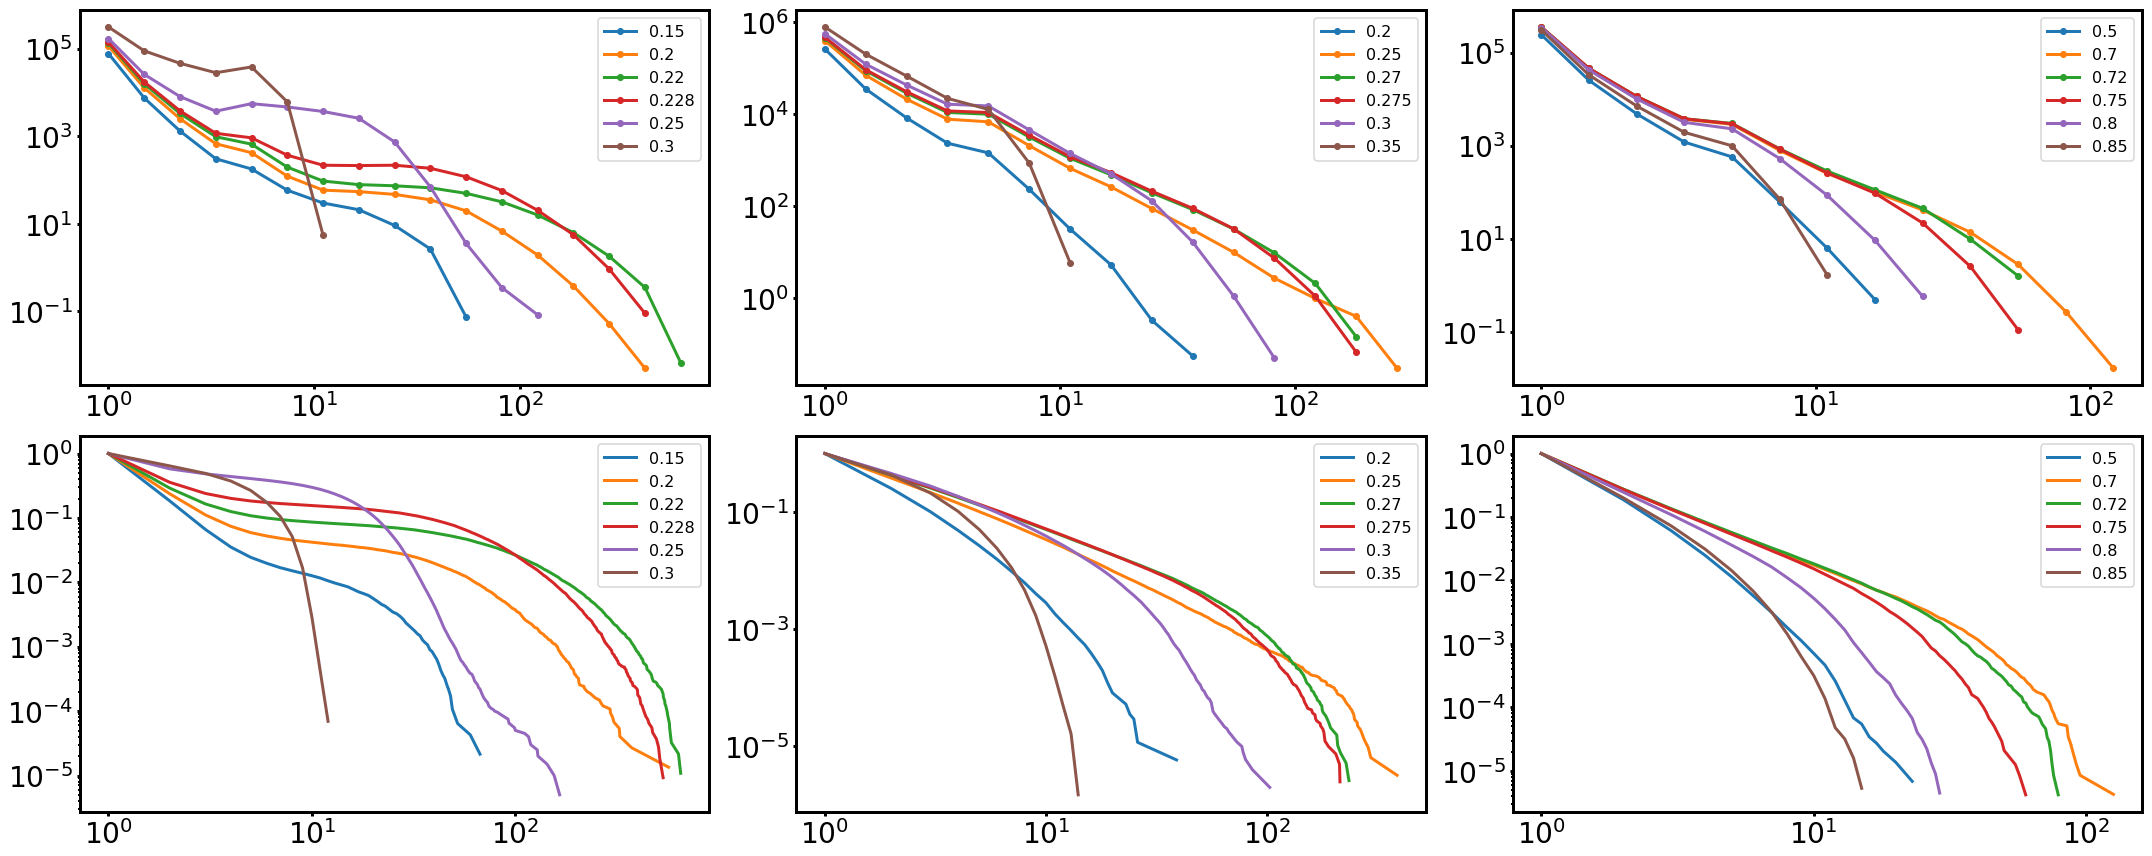

In [381]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, attack in enumerate(attacks):

    ax0 = axes[0][i]
    ax1 = axes[1][i]
    for f_value in f_values_by_attack[attack]:
        Y = all_comp_sizes_dict[attack][f_value]
        hist = np.histogram(Y, bins=bins)
        hist_norm = hist[0]/widths
        hist_norm[hist_norm==0] = np.NaN
        ax0.plot(bins[:-1], hist_norm, 'o-', label=f_value)
        
        sorted_vals, ccdf = get_ccdf(Y)
        ax1.plot(sorted_vals, ccdf, '-', label=f_value)     
        
    ax0.legend(loc='best', fontsize=16)
    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax1.legend(loc='best', fontsize=16)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

plt.tight_layout()
plt.show()

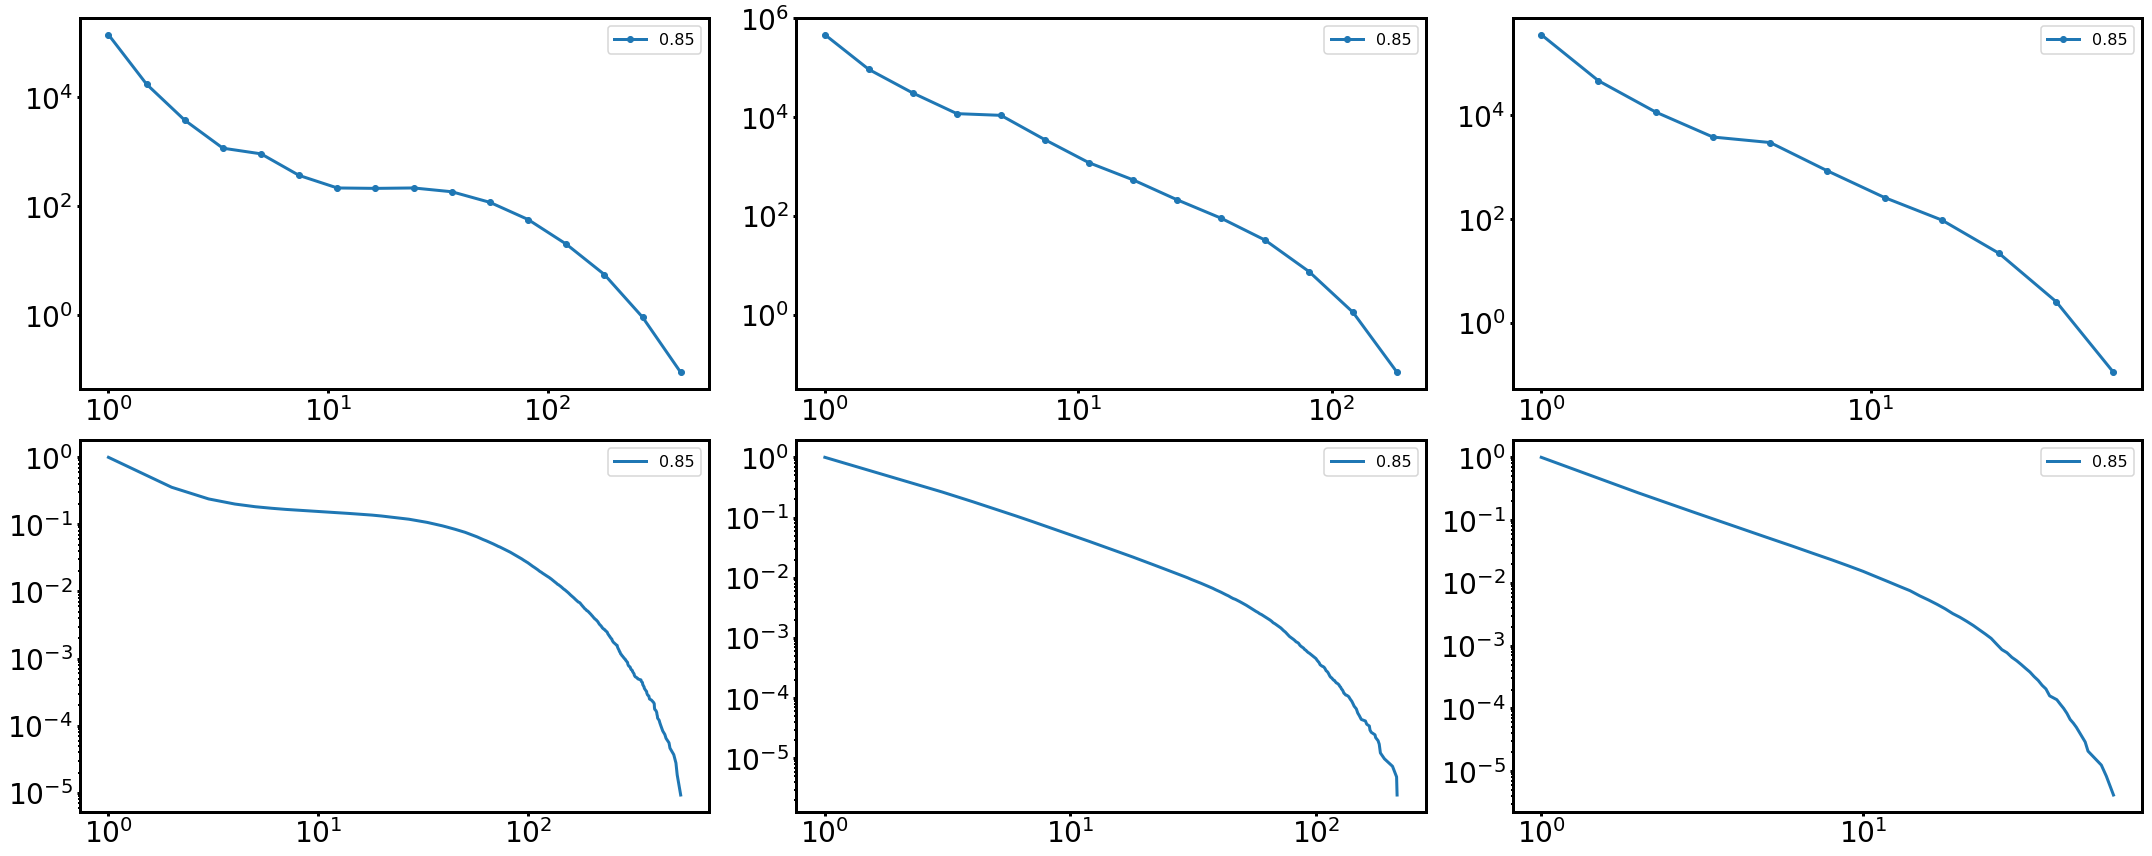

In [396]:
# log-scaled bins
bins = np.logspace(0, np.log10(N), 20)
widths = (bins[1:] - bins[:-1])

ncols = 3
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

crit_f_values = [0.228, 0.275, 0.75]
for i, attack in enumerate(attacks):

    ax0 = axes[0][i]
    ax1 = axes[1][i]

    f_value
    Y = all_comp_sizes_dict[attack][crit_f_values[i]]
    hist = np.histogram(Y, bins=bins)
    hist_norm = hist[0]/widths
    hist_norm[hist_norm==0] = np.NaN
    ax0.plot(bins[:-1], hist_norm, 'o-', label=f_value)

    sorted_vals, ccdf = get_ccdf(Y)
    ax1.plot(sorted_vals, ccdf, '-', label=f_value)     
        
    ax0.legend(loc='best', fontsize=16)
    ax0.set_xscale('log')
    ax0.set_yscale('log')

    ax1.legend(loc='best', fontsize=16)
    ax1.set_xscale('log')
    ax1.set_yscale('log')

plt.tight_layout()
plt.show()

### FSSA

In [568]:
import fssa
from scipy.interpolate import interp1d

In [734]:
f = {}
f3 = {}

attack = 'Ran'
for N in N_values[:-2]:
    Ngcc0 = int(mean_Ngcc_values[N][attack][0])
    X = np.arange(Ngcc0) / Ngcc0
    Y = mean_Nsec_values[N][attack][:Ngcc0] / Ngcc0
    Y = mean_finiteSizeMeassures['meanS'][N][attack][:Ngcc0]
    Y = np.nan_to_num(Y)
    Y[Y==0] = 1
    f[N] = interp1d(X, Y)
    f3[N] = interp1d(X, Y, kind='cubic')

In [735]:
arr = []
X = np.linspace(0.2, 0.25, 1000)
for N in N_values[:-2]:
    arr.append(f3[N](X))
    
arr = np.array(arr)
darr = 0.1*arr

In [736]:
ret = fssa.autoscale(np.array(N_values[:-2]), X, arr, darr, 0.75, -1, 3)
#ret = fssa.autoscale(np.array(N_values[:-2]), X, arr, darr, 0.225, 1.5, 1.8)

In [737]:
ret

           dnu: nan
          drho: nan
         dzeta: nan
        errors: array([nan, nan, nan])
 final_simplex: (array([[ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ],
       [ 0.75, -1.  ,  3.  ]]), array([nan, nan, nan, nan]))
           fun: nan
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 604
           nit: 121
            nu: -1.0
           rho: 0.75
        status: 1
       success: False
         varco: array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])
             x: array([ 0.75, -1.  ,  3.  ])
          zeta: 3.0

In [738]:
print(r'f_c = ' + '{:.4f} +- {:.4f}'.format(ret.rho, ret.drho))
print(r'beta = ' + '{:.4f} +- {:.4f}'.format(ret.zeta, ret.dzeta))
print(r"nu' = " + '{:.4f} +- {:.4f}'.format(ret.nu, ret.dnu))

f_c = 0.7500 +- nan
beta = 3.0000 +- nan
nu' = -1.0000 +- nan


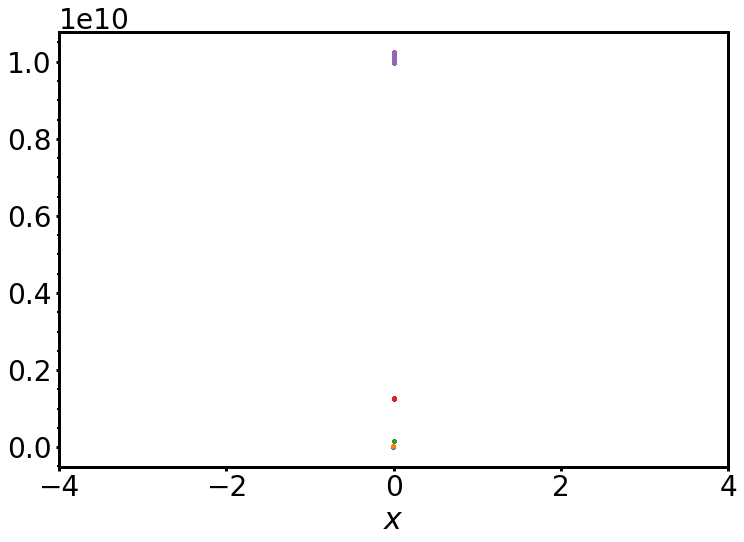

In [739]:
auto_scaled_data = fssa.scaledata(N_values[:-2], X, arr, darr, ret.rho, ret.nu, ret.zeta)

fig, ax = plt.subplots(figsize=(12, 8))
#ax.set_prop_cycle(cycler('color', palette))
ax.plot(
    auto_scaled_data.x.T, auto_scaled_data.y.T,
    '.',
)
ax.set_xbound(-4, 4)
ax.set_xlabel(r'$x$')
plt.show()

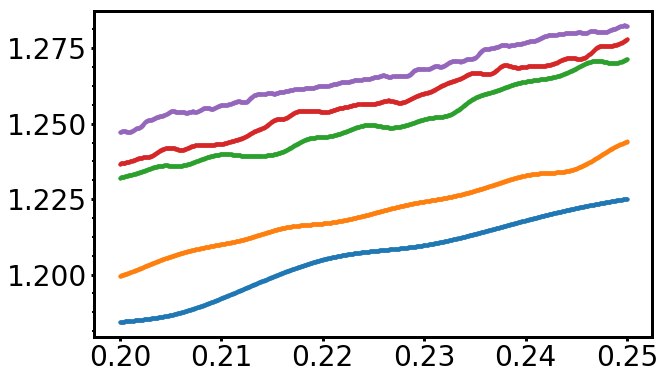

In [740]:
ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes
for i, N in enumerate(N_values[:-2]):
    ax.plot(X, arr[i], '.')
#ax.set_xlim(0.5, 0.7)
#ax.set_ylim(2.8, 5.2)
plt.show()